In [2]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import pandas as pd
import seaborn as sns
path =  (os.path.abspath(os.path.join(r'.', os.pardir)))
import sys
sys.path.append(path)
from images_segmentation import two_level_otsu as tlot
from images_segmentation import dicescore as dsc


Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Set ground truth images from N2DH-GOWT1 dataset and N2DL-HeLa dataset to 0 and 1

def binarize(x):
    img = x.copy()

    for o in np.ndindex(img.shape):
        if img[o] > 0: 
           img[o] = 1
        else:
            img[o] = 0
    
    return img

In [4]:
# Preprocessing - Histogram stretching

def stretch(x):
    intensities = []
   
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(x, (2,  98))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
   
    img_max = max(intensities)
    img_min = min(intensities)
    img_stretch = (img-img_min)*(256 / (img_max-img_min))
    return img_stretch

In [5]:
# Load raw images from N2DH-GOWT1-dataset

img_N2DH_GOWT1_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/img/t01.tif"))
img_N2DH_GOWT1_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/img/t21.tif"))
img_N2DH_GOWT1_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/img/t31.tif"))
img_N2DH_GOWT1_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/img/t39.tif"))
img_N2DH_GOWT1_5 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/img/t52.tif"))
img_N2DH_GOWT1_6 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/img/t72.tif"))


# Load ground truth images from N2DH-GOWT1-dataset

gt_N2DH_GOWT1_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/gt/man_seg01.tif"))
gt_N2DH_GOWT1_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/gt/man_seg21.tif"))
gt_N2DH_GOWT1_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/gt/man_seg31.tif"))
gt_N2DH_GOWT1_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/gt/man_seg39.tif"))
gt_N2DH_GOWT1_5 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/gt/man_seg52.tif"))
gt_N2DH_GOWT1_6 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DH-GOWT1/gt/man_seg72.tif"))


In [7]:
# Load raw images from N2DL-HeLa-dataset

img_N2DL_HeLa_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/img/t13.tif"))
img_N2DL_HeLa_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/img/t52.tif"))
img_N2DL_HeLa_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/img/t75.tif"))
img_N2DL_HeLa_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/img/t79.tif"))


# Load ground truth images from N2Dl-HeLa-dataset

gt_N2DL_HeLa_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/gt/man_seg13.tif"))
gt_N2DL_HeLa_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/gt/man_seg52.tif"))
gt_N2DL_HeLa_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/gt/man_seg75.tif"))
gt_N2DL_HeLa_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/gt/man_seg79.tif"))

In [8]:
# Load raw images of NIH3T3-dataset

img_NIH3T3_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-0.png"))
img_NIH3T3_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-1.png"))
img_NIH3T3_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-26.png"))
img_NIH3T3_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-27.png"))
img_NIH3T3_5 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-28.png"))
img_NIH3T3_6 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-29.png"))
img_NIH3T3_7 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-30.png"))
img_NIH3T3_8 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-31.png"))
img_NIH3T3_9 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-32.png"))
img_NIH3T3_10 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-33.png"))
img_NIH3T3_11 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-37.png"))
img_NIH3T3_12 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-40.png"))
img_NIH3T3_13 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-42.png"))
img_NIH3T3_14 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-44.png"))
img_NIH3T3_15 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-45.png"))
img_NIH3T3_16 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-46.png"))
img_NIH3T3_17 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-47.png"))
img_NIH3T3_18 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img/dna-49.png"))

# Load ground truth images of NIH3T3-dataset
 
gt_NIH3T3_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/0.png"))
gt_NIH3T3_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/1.png"))
gt_NIH3T3_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/26.png"))
gt_NIH3T3_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/27.png"))
gt_NIH3T3_5 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/28.png"))
gt_NIH3T3_6 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/29.png"))
gt_NIH3T3_7 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/30.png"))
gt_NIH3T3_8 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/31.png"))
gt_NIH3T3_9 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/32.png"))
gt_NIH3T3_10 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/33.png"))
gt_NIH3T3_11 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/37.png"))
gt_NIH3T3_12 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/40.png"))
gt_NIH3T3_13 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/42.png"))
gt_NIH3T3_14 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/44.png"))
gt_NIH3T3_15 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/45.png"))
gt_NIH3T3_16 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/46.png"))
gt_NIH3T3_17 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/47.png"))
gt_NIH3T3_18 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt/49.png"))

In [34]:
# Reassign the ground truth images from N2DH-GOWT1 dataset and N2DLHeLa dataset

binary_gt_N2DH_GOWT1_1 = binarize(gt_N2DH_GOWT1_1)
binary_gt_N2DH_GOWT1_2 = binarize(gt_N2DH_GOWT1_2)
binary_gt_N2DH_GOWT1_3 = binarize(gt_N2DH_GOWT1_3)
binary_gt_N2DH_GOWT1_4 = binarize(gt_N2DH_GOWT1_4)
binary_gt_N2DH_GOWT1_5 = binarize(gt_N2DH_GOWT1_5)
binary_gt_N2DH_GOWT1_6 = binarize(gt_N2DH_GOWT1_6)

binary_gt_N2DL_HeLa_1 = binarize(gt_N2DL_HeLa_1)
binary_gt_N2DL_HeLa_2 = binarize(gt_N2DL_HeLa_2)
binary_gt_N2DL_HeLa_3 = binarize(gt_N2DL_HeLa_3)
binary_gt_N2DL_HeLa_4 = binarize(gt_N2DL_HeLa_4)

In [35]:
# Make a copy of all images of each dataset / use as "no preprocessed images"

copy_img_N2DH_GOWT1_1 = img_N2DH_GOWT1_1.copy()
copy_img_N2DH_GOWT1_2 = img_N2DH_GOWT1_2.copy()
copy_img_N2DH_GOWT1_3 = img_N2DH_GOWT1_3.copy()
copy_img_N2DH_GOWT1_4 = img_N2DH_GOWT1_4.copy()
copy_img_N2DH_GOWT1_5 = img_N2DH_GOWT1_5.copy()
copy_img_N2DH_GOWT1_6 = img_N2DH_GOWT1_6.copy()


copy_img_N2DL_HeLa_1 = img_N2DL_HeLa_1.copy()
copy_img_N2DL_HeLa_2 = img_N2DL_HeLa_2.copy()
copy_img_N2DL_HeLa_3 = img_N2DL_HeLa_3.copy()
copy_img_N2DL_HeLa_4 = img_N2DL_HeLa_4.copy()


copy_img_NIH3T3_1 = img_NIH3T3_1.copy()
copy_img_NIH3T3_2 = img_NIH3T3_2.copy()
copy_img_NIH3T3_3 = img_NIH3T3_3.copy()
copy_img_NIH3T3_4 = img_NIH3T3_4.copy()
copy_img_NIH3T3_5 = img_NIH3T3_5.copy()
copy_img_NIH3T3_6 = img_NIH3T3_6.copy()
copy_img_NIH3T3_7 = img_NIH3T3_7.copy()
copy_img_NIH3T3_8 = img_NIH3T3_8.copy()
copy_img_NIH3T3_9 = img_NIH3T3_9.copy()
copy_img_NIH3T3_10 = img_NIH3T3_10.copy()
copy_img_NIH3T3_11 = img_NIH3T3_11.copy()
copy_img_NIH3T3_12 = img_NIH3T3_12.copy()
copy_img_NIH3T3_13 = img_NIH3T3_13.copy()
copy_img_NIH3T3_14 = img_NIH3T3_14.copy()
copy_img_NIH3T3_15 = img_NIH3T3_15.copy()
copy_img_NIH3T3_16 = img_NIH3T3_16.copy()
copy_img_NIH3T3_17 = img_NIH3T3_17.copy()
copy_img_NIH3T3_18 = img_NIH3T3_18.copy()

In [36]:
# Apply median filter to all images of each dataset

median_img_N2DH_GOWT1_1 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_1, 5)
median_img_N2DH_GOWT1_2 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_2, 5)
median_img_N2DH_GOWT1_3 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_3, 5)
median_img_N2DH_GOWT1_4 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_4, 5)
median_img_N2DH_GOWT1_5 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_5, 5)
median_img_N2DH_GOWT1_6 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_6, 5)


median_img_N2DL_HeLa_1 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_1, 5)
median_img_N2DL_HeLa_2 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_2, 5)
median_img_N2DL_HeLa_3 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_3, 5)
median_img_N2DL_HeLa_4 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_4, 5)


median_img_NIH3T3_1 = scipy.ndimage.median_filter(copy_img_NIH3T3_1, 5)
median_img_NIH3T3_2 = scipy.ndimage.median_filter(copy_img_NIH3T3_2, 5)
median_img_NIH3T3_3 = scipy.ndimage.median_filter(copy_img_NIH3T3_3, 5)
median_img_NIH3T3_4 = scipy.ndimage.median_filter(copy_img_NIH3T3_4, 5)
median_img_NIH3T3_5 = scipy.ndimage.median_filter(copy_img_NIH3T3_5, 5)
median_img_NIH3T3_6 = scipy.ndimage.median_filter(copy_img_NIH3T3_6, 5)
median_img_NIH3T3_7 = scipy.ndimage.median_filter(copy_img_NIH3T3_7, 5)
median_img_NIH3T3_8 = scipy.ndimage.median_filter(copy_img_NIH3T3_8, 5)
median_img_NIH3T3_9 = scipy.ndimage.median_filter(copy_img_NIH3T3_9, 5)
median_img_NIH3T3_10 = scipy.ndimage.median_filter(copy_img_NIH3T3_10, 5)
median_img_NIH3T3_11 = scipy.ndimage.median_filter(copy_img_NIH3T3_11, 5)
median_img_NIH3T3_12 = scipy.ndimage.median_filter(copy_img_NIH3T3_12, 5)
median_img_NIH3T3_13 = scipy.ndimage.median_filter(copy_img_NIH3T3_13, 5)
median_img_NIH3T3_14 = scipy.ndimage.median_filter(copy_img_NIH3T3_14, 5)
median_img_NIH3T3_15 = scipy.ndimage.median_filter(copy_img_NIH3T3_15, 5)
median_img_NIH3T3_16 = scipy.ndimage.median_filter(copy_img_NIH3T3_16, 5)
median_img_NIH3T3_17 = scipy.ndimage.median_filter(copy_img_NIH3T3_17, 5)
median_img_NIH3T3_18 = scipy.ndimage.median_filter(copy_img_NIH3T3_18, 5)


In [37]:
# Apply gaussian filter to all images of each dataset

gauss_img_N2DH_GOWT1_1 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_1, 5)
gauss_img_N2DH_GOWT1_2 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_2, 5)
gauss_img_N2DH_GOWT1_3 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_3, 5)
gauss_img_N2DH_GOWT1_4 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_4, 5)
gauss_img_N2DH_GOWT1_5 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_5, 5)
gauss_img_N2DH_GOWT1_6 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_6, 5)


gauss_img_N2DL_HeLa_1 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_1, 5)
gauss_img_N2DL_HeLa_2 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_2, 5)
gauss_img_N2DL_HeLa_3 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_3, 5)
gauss_img_N2DL_HeLa_4 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_4, 5)


gauss_img_NIH3T3_1 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_1, 5)
gauss_img_NIH3T3_2 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_2, 5)
gauss_img_NIH3T3_3 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_3, 5)
gauss_img_NIH3T3_4 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_4, 5)
gauss_img_NIH3T3_5 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_5, 5)
gauss_img_NIH3T3_6 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_6, 5)
gauss_img_NIH3T3_7 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_7, 5)
gauss_img_NIH3T3_8 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_8, 5)
gauss_img_NIH3T3_9 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_9, 5)
gauss_img_NIH3T3_10 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_10, 5)
gauss_img_NIH3T3_11 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_11, 5)
gauss_img_NIH3T3_12 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_12, 5)
gauss_img_NIH3T3_13 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_13, 5)
gauss_img_NIH3T3_14 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_14, 5)
gauss_img_NIH3T3_15 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_15, 5)
gauss_img_NIH3T3_16 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_16, 5)
gauss_img_NIH3T3_17 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_17, 5)
gauss_img_NIH3T3_18 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_18, 5)

In [38]:
# Apply histogram stretching to all images of each dataset

stretch_img_N2DH_GOWT1_1 = stretch(copy_img_N2DH_GOWT1_1)
stretch_img_N2DH_GOWT1_2 = stretch(copy_img_N2DH_GOWT1_2)
stretch_img_N2DH_GOWT1_3 = stretch(copy_img_N2DH_GOWT1_3)
stretch_img_N2DH_GOWT1_4 = stretch(copy_img_N2DH_GOWT1_4)
stretch_img_N2DH_GOWT1_5 = stretch(copy_img_N2DH_GOWT1_5)
stretch_img_N2DH_GOWT1_6 = stretch(copy_img_N2DH_GOWT1_6)


stretch_img_N2DL_HeLa_1 = stretch(copy_img_N2DL_HeLa_1)
stretch_img_N2DL_HeLa_2 = stretch(copy_img_N2DL_HeLa_2)
stretch_img_N2DL_HeLa_3 = stretch(copy_img_N2DL_HeLa_3)
stretch_img_N2DL_HeLa_4 = stretch(copy_img_N2DL_HeLa_4)


stretch_img_NIH3T3_1 = stretch(copy_img_NIH3T3_1)
stretch_img_NIH3T3_2 = stretch(copy_img_NIH3T3_2)
stretch_img_NIH3T3_3 = stretch(copy_img_NIH3T3_3)
stretch_img_NIH3T3_4 = stretch(copy_img_NIH3T3_4)
stretch_img_NIH3T3_5 = stretch(copy_img_NIH3T3_5)
stretch_img_NIH3T3_6 = stretch(copy_img_NIH3T3_6)
stretch_img_NIH3T3_7 = stretch(copy_img_NIH3T3_7)
stretch_img_NIH3T3_8 = stretch(copy_img_NIH3T3_8)
stretch_img_NIH3T3_9 = stretch(copy_img_NIH3T3_9)
stretch_img_NIH3T3_10 = stretch(copy_img_NIH3T3_10)
stretch_img_NIH3T3_11 = stretch(copy_img_NIH3T3_11)
stretch_img_NIH3T3_12 = stretch(copy_img_NIH3T3_12)
stretch_img_NIH3T3_13 = stretch(copy_img_NIH3T3_13)
stretch_img_NIH3T3_14 = stretch(copy_img_NIH3T3_14)
stretch_img_NIH3T3_15 = stretch(copy_img_NIH3T3_15)
stretch_img_NIH3T3_16 = stretch(copy_img_NIH3T3_16)
stretch_img_NIH3T3_17 = stretch(copy_img_NIH3T3_17)
stretch_img_NIH3T3_18 = stretch(copy_img_NIH3T3_18)

In [39]:
# Apply median filter and histogram strechting to all images of each dataset

median_stretch_img_N2DH_GOWT1_1 = stretch(median_img_N2DH_GOWT1_1)
median_stretch_img_N2DH_GOWT1_2 = stretch(median_img_N2DH_GOWT1_2)
median_stretch_img_N2DH_GOWT1_3 = stretch(median_img_N2DH_GOWT1_3)
median_stretch_img_N2DH_GOWT1_4 = stretch(median_img_N2DH_GOWT1_4)
median_stretch_img_N2DH_GOWT1_5 = stretch(median_img_N2DH_GOWT1_5)
median_stretch_img_N2DH_GOWT1_6 = stretch(median_img_N2DH_GOWT1_6)


median_stretch_img_N2DL_HeLa_1 = stretch(median_img_N2DL_HeLa_1)
median_stretch_img_N2DL_HeLa_2 = stretch(median_img_N2DL_HeLa_2)
median_stretch_img_N2DL_HeLa_3 = stretch(median_img_N2DL_HeLa_3)
median_stretch_img_N2DL_HeLa_4 = stretch(median_img_N2DL_HeLa_4)


median_stretch_img_NIH3T3_1 = stretch(median_img_NIH3T3_1)
median_stretch_img_NIH3T3_2 = stretch(median_img_NIH3T3_2)
median_stretch_img_NIH3T3_3 = stretch(median_img_NIH3T3_3)
median_stretch_img_NIH3T3_4 = stretch(median_img_NIH3T3_4)
median_stretch_img_NIH3T3_5 = stretch(median_img_NIH3T3_5)
median_stretch_img_NIH3T3_6 = stretch(median_img_NIH3T3_6)
median_stretch_img_NIH3T3_7 = stretch(median_img_NIH3T3_7)
median_stretch_img_NIH3T3_8 = stretch(median_img_NIH3T3_8)
median_stretch_img_NIH3T3_9 = stretch(median_img_NIH3T3_9)
median_stretch_img_NIH3T3_10 = stretch(median_img_NIH3T3_10)
median_stretch_img_NIH3T3_11 = stretch(median_img_NIH3T3_11)
median_stretch_img_NIH3T3_12 = stretch(median_img_NIH3T3_12)
median_stretch_img_NIH3T3_13 = stretch(median_img_NIH3T3_13)
median_stretch_img_NIH3T3_14 = stretch(median_img_NIH3T3_14)
median_stretch_img_NIH3T3_15 = stretch(median_img_NIH3T3_15)
median_stretch_img_NIH3T3_16 = stretch(median_img_NIH3T3_16)
median_stretch_img_NIH3T3_17 = stretch(median_img_NIH3T3_17)
median_stretch_img_NIH3T3_18 = stretch(median_img_NIH3T3_18)

In [40]:
# Apply histogram stretching and median filter to all images of each dataset

stretch_median_img_N2DH_GOWT1_1 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_1, 5)
stretch_median_img_N2DH_GOWT1_2 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_2, 5)
stretch_median_img_N2DH_GOWT1_3 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_3, 5)
stretch_median_img_N2DH_GOWT1_4 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_4, 5)
stretch_median_img_N2DH_GOWT1_5 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_5, 5)
stretch_median_img_N2DH_GOWT1_6 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_6, 5)


stretch_median_img_N2DL_HeLa_1 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_1, 5)
stretch_median_img_N2DL_HeLa_2 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_2, 5)
stretch_median_img_N2DL_HeLa_3 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_3, 5)
stretch_median_img_N2DL_HeLa_4 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_4, 5)


stretch_median_img_NIH3T3_1 = scipy.ndimage.median_filter(stretch_img_NIH3T3_1, 5)
stretch_median_img_NIH3T3_2 = scipy.ndimage.median_filter(stretch_img_NIH3T3_2, 5)
stretch_median_img_NIH3T3_3 = scipy.ndimage.median_filter(stretch_img_NIH3T3_3, 5)
stretch_median_img_NIH3T3_4 = scipy.ndimage.median_filter(stretch_img_NIH3T3_4, 5)
stretch_median_img_NIH3T3_5 = scipy.ndimage.median_filter(stretch_img_NIH3T3_5, 5)
stretch_median_img_NIH3T3_6 = scipy.ndimage.median_filter(stretch_img_NIH3T3_6, 5)
stretch_median_img_NIH3T3_7 = scipy.ndimage.median_filter(stretch_img_NIH3T3_7, 5)
stretch_median_img_NIH3T3_8 = scipy.ndimage.median_filter(stretch_img_NIH3T3_8, 5)
stretch_median_img_NIH3T3_9 = scipy.ndimage.median_filter(stretch_img_NIH3T3_9, 5)
stretch_median_img_NIH3T3_10 = scipy.ndimage.median_filter(stretch_img_NIH3T3_10, 5)
stretch_median_img_NIH3T3_11 = scipy.ndimage.median_filter(stretch_img_NIH3T3_11, 5)
stretch_median_img_NIH3T3_12 = scipy.ndimage.median_filter(stretch_img_NIH3T3_12, 5)
stretch_median_img_NIH3T3_13 = scipy.ndimage.median_filter(stretch_img_NIH3T3_13, 5)
stretch_median_img_NIH3T3_14 = scipy.ndimage.median_filter(stretch_img_NIH3T3_14, 5)
stretch_median_img_NIH3T3_15 = scipy.ndimage.median_filter(stretch_img_NIH3T3_15, 5)
stretch_median_img_NIH3T3_16 = scipy.ndimage.median_filter(stretch_img_NIH3T3_16, 5)
stretch_median_img_NIH3T3_17 = scipy.ndimage.median_filter(stretch_img_NIH3T3_17, 5)
stretch_median_img_NIH3T3_18 = scipy.ndimage.median_filter(stretch_img_NIH3T3_18, 5)

In [41]:
# Apply gaussian filter and histogram strechting to all images of each dataset

gauss_stretch_img_N2DH_GOWT1_1 = stretch(gauss_img_N2DH_GOWT1_1)
gauss_stretch_img_N2DH_GOWT1_2 = stretch(gauss_img_N2DH_GOWT1_2)
gauss_stretch_img_N2DH_GOWT1_3 = stretch(gauss_img_N2DH_GOWT1_3)
gauss_stretch_img_N2DH_GOWT1_4 = stretch(gauss_img_N2DH_GOWT1_4)
gauss_stretch_img_N2DH_GOWT1_5 = stretch(gauss_img_N2DH_GOWT1_5)
gauss_stretch_img_N2DH_GOWT1_6 = stretch(gauss_img_N2DH_GOWT1_6)


gauss_stretch_img_N2DL_HeLa_1 = stretch(gauss_img_N2DL_HeLa_1)
gauss_stretch_img_N2DL_HeLa_2 = stretch(gauss_img_N2DL_HeLa_2)
gauss_stretch_img_N2DL_HeLa_3 = stretch(gauss_img_N2DL_HeLa_3)
gauss_stretch_img_N2DL_HeLa_4 = stretch(gauss_img_N2DL_HeLa_4)


gauss_stretch_img_NIH3T3_1 = stretch(gauss_img_NIH3T3_1)
gauss_stretch_img_NIH3T3_2 = stretch(gauss_img_NIH3T3_2)
gauss_stretch_img_NIH3T3_3 = stretch(gauss_img_NIH3T3_3)
gauss_stretch_img_NIH3T3_4 = stretch(gauss_img_NIH3T3_4)
gauss_stretch_img_NIH3T3_5 = stretch(gauss_img_NIH3T3_5)
gauss_stretch_img_NIH3T3_6 = stretch(gauss_img_NIH3T3_6)
gauss_stretch_img_NIH3T3_7 = stretch(gauss_img_NIH3T3_7)
gauss_stretch_img_NIH3T3_8 = stretch(gauss_img_NIH3T3_8)
gauss_stretch_img_NIH3T3_9 = stretch(gauss_img_NIH3T3_9)
gauss_stretch_img_NIH3T3_10 = stretch(gauss_img_NIH3T3_10)
gauss_stretch_img_NIH3T3_11 = stretch(gauss_img_NIH3T3_11)
gauss_stretch_img_NIH3T3_12 = stretch(gauss_img_NIH3T3_12)
gauss_stretch_img_NIH3T3_13 = stretch(gauss_img_NIH3T3_13)
gauss_stretch_img_NIH3T3_14 = stretch(gauss_img_NIH3T3_14)
gauss_stretch_img_NIH3T3_15 = stretch(gauss_img_NIH3T3_15)
gauss_stretch_img_NIH3T3_16 = stretch(gauss_img_NIH3T3_16)
gauss_stretch_img_NIH3T3_17 = stretch(gauss_img_NIH3T3_17)
gauss_stretch_img_NIH3T3_18 = stretch(gauss_img_NIH3T3_18)

In [42]:
# Apply histogram stretching and gaussian filter to all images of each dataset

stretch_gauss_img_N2DH_GOWT1_1 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_1, 5)
stretch_gauss_img_N2DH_GOWT1_2 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_2, 5)
stretch_gauss_img_N2DH_GOWT1_3 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_3, 5)
stretch_gauss_img_N2DH_GOWT1_4 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_4, 5)
stretch_gauss_img_N2DH_GOWT1_5 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_5, 5)
stretch_gauss_img_N2DH_GOWT1_6 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_6, 5)


stretch_gauss_img_N2DL_HeLa_1 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_1, 5)
stretch_gauss_img_N2DL_HeLa_2 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_2, 5)
stretch_gauss_img_N2DL_HeLa_3 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_3, 5)
stretch_gauss_img_N2DL_HeLa_4 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_4, 5)


stretch_gauss_img_NIH3T3_1 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_1, 5)
stretch_gauss_img_NIH3T3_2 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_2, 5)
stretch_gauss_img_NIH3T3_3 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_3, 5)
stretch_gauss_img_NIH3T3_4 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_4, 5)
stretch_gauss_img_NIH3T3_5 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_5, 5)
stretch_gauss_img_NIH3T3_6 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_6, 5)
stretch_gauss_img_NIH3T3_7 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_7, 5)
stretch_gauss_img_NIH3T3_8 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_8, 5)
stretch_gauss_img_NIH3T3_9 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_9, 5)
stretch_gauss_img_NIH3T3_10 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_10, 5)
stretch_gauss_img_NIH3T3_11 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_11, 5)
stretch_gauss_img_NIH3T3_12 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_12, 5)
stretch_gauss_img_NIH3T3_13 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_13, 5)
stretch_gauss_img_NIH3T3_14 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_14, 5)
stretch_gauss_img_NIH3T3_15 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_15, 5)
stretch_gauss_img_NIH3T3_16 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_16, 5)
stretch_gauss_img_NIH3T3_17 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_17, 5)
stretch_gauss_img_NIH3T3_18 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_18, 5)

In [43]:
# Apply otsu thresholding to all images of each dataset - no preprocessing

otsu_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding(copy_img_N2DH_GOWT1_1 , 256)
otsu_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding(copy_img_N2DH_GOWT1_2 , 256)
otsu_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding(copy_img_N2DH_GOWT1_3 , 256)
otsu_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding(copy_img_N2DH_GOWT1_4 , 256)
otsu_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding(copy_img_N2DH_GOWT1_5 , 256)
otsu_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding(copy_img_N2DH_GOWT1_6 , 256)


otsu_img_N2DL_HeLa_1 = tlot.two_level_otsu_thresholding(copy_img_N2DL_HeLa_1 , 256) 
otsu_img_N2DL_HeLa_2 = tlot.two_level_otsu_thresholding(copy_img_N2DL_HeLa_2 , 256) 
otsu_img_N2DL_HeLa_3 = tlot.two_level_otsu_thresholding(copy_img_N2DL_HeLa_3 , 256) 
otsu_img_N2DL_HeLa_4 = tlot.two_level_otsu_thresholding(copy_img_N2DL_HeLa_4 , 256) 


otsu_img_NIH3T3_1 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_1 , 256)
otsu_img_NIH3T3_2 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_2 , 256)
otsu_img_NIH3T3_3 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_3 , 256)
otsu_img_NIH3T3_4 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_4 , 256)
otsu_img_NIH3T3_5 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_5 , 256)
otsu_img_NIH3T3_6 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_6 , 256)
otsu_img_NIH3T3_7 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_7 , 256)
otsu_img_NIH3T3_8 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_8 , 256)
otsu_img_NIH3T3_9 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_9 , 256)
otsu_img_NIH3T3_10 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_10 , 256)
otsu_img_NIH3T3_11 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_11 , 256)
otsu_img_NIH3T3_12 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_12 , 256)
otsu_img_NIH3T3_13 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_13 , 256)
otsu_img_NIH3T3_14 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_14 , 256)
otsu_img_NIH3T3_15 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_15 , 256)
otsu_img_NIH3T3_16 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_16 , 256)
otsu_img_NIH3T3_17 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_17 , 256)
otsu_img_NIH3T3_18 = tlot.two_level_otsu_thresholding(copy_img_NIH3T3_18 , 256)

NameError: name 'mean1' is not defined

In [ ]:
# Apply otsu thresholding to all images of each dataset - median filter

otsu_median_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding(median_img_N2DH_GOWT1_1 , 256)
otsu_median_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding(median_img_N2DH_GOWT1_2 , 256)
otsu_median_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding(median_img_N2DH_GOWT1_3 , 256)
otsu_median_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding(median_img_N2DH_GOWT1_4 , 256)
otsu_median_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding(median_img_N2DH_GOWT1_5 , 256)
otsu_median_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding(median_img_N2DH_GOWT1_6 , 256)


otsu_median_img_N2DL_HeLa_1 = tlot.two_level_otsu_thresholding(median_img_N2DL_HeLa_1 , 256) 
otsu_median_img_N2DL_HeLa_2 = tlot.two_level_otsu_thresholding(median_img_N2DL_HeLa_2 , 256) 
otsu_median_img_N2DL_HeLa_3 = tlot.two_level_otsu_thresholding(median_img_N2DL_HeLa_3 , 256) 
otsu_median_img_N2DL_HeLa_4 = tlot.two_level_otsu_thresholding(median_img_N2DL_HeLa_4 , 256) 


otsu_median_img_NIH3T3_1 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_1 , 256)
otsu_median_img_NIH3T3_2 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_2 , 256)
otsu_median_img_NIH3T3_3 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_3 , 256)
otsu_median_img_NIH3T3_4 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_4 , 256)
otsu_median_img_NIH3T3_5 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_5 , 256)
otsu_median_img_NIH3T3_6 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_6 , 256)
otsu_median_img_NIH3T3_7 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_7 , 256)
otsu_median_img_NIH3T3_8 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_8 , 256)
otsu_median_img_NIH3T3_9 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_9 , 256)
otsu_median_img_NIH3T3_10 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_10 , 256)
otsu_median_img_NIH3T3_11 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_11 , 256)
otsu_median_img_NIH3T3_12 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_12 , 256)
otsu_median_img_NIH3T3_13 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_13 , 256)
otsu_median_img_NIH3T3_14 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_14 , 256)
otsu_median_img_NIH3T3_15 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_15 , 256)
otsu_median_img_NIH3T3_16 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_16 , 256)
otsu_median_img_NIH3T3_17 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_17 , 256)
otsu_median_img_NIH3T3_18 = tlot.two_level_otsu_thresholding(median_img_NIH3T3_18 , 256)

In [ ]:
# Apply otsu thresholding to all images of each dataset - gaussian filter
otsu_gauss_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding(gauss_img_N2DH_GOWT1_1 , 256)
otsu_gauss_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding(gauss_img_N2DH_GOWT1_2 , 256)
otsu_gauss_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding(gauss_img_N2DH_GOWT1_3 , 256)
otsu_gauss_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding(gauss_img_N2DH_GOWT1_4 , 256)
otsu_gauss_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding(gauss_img_N2DH_GOWT1_5 , 256)
otsu_gauss_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding(gauss_img_N2DH_GOWT1_6 , 256)


otsu_gauss_img_N2DL_HeLa_1 = tlot.two_level_otsu_thresholding(gauss_img_N2DL_HeLa_1 , 256) 
otsu_gauss_img_N2DL_HeLa_2 = tlot.two_level_otsu_thresholding(gauss_img_N2DL_HeLa_2 , 256) 
otsu_gauss_img_N2DL_HeLa_3 = tlot.two_level_otsu_thresholding(gauss_img_N2DL_HeLa_3 , 256) 
otsu_gauss_img_N2DL_HeLa_4 = tlot.two_level_otsu_thresholding(gauss_img_N2DL_HeLa_4 , 256) 


otsu_gauss_img_NIH3T3_1 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_1 , 256)
otsu_gauss_img_NIH3T3_2 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_2 , 256)
otsu_gauss_img_NIH3T3_3 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_3 , 256)
otsu_gauss_img_NIH3T3_4 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_4 , 256)
otsu_gauss_img_NIH3T3_5 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_5 , 256)
otsu_gauss_img_NIH3T3_6 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_6 , 256)
otsu_gauss_img_NIH3T3_7 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_7 , 256)
otsu_gauss_img_NIH3T3_8 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_8 , 256)
otsu_gauss_img_NIH3T3_9 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_9 , 256)
otsu_gauss_img_NIH3T3_10 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_10 , 256)
otsu_gauss_img_NIH3T3_11 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_11 , 256)
otsu_gauss_img_NIH3T3_12 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_12 , 256)
otsu_gauss_img_NIH3T3_13 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_13 , 256)
otsu_gauss_img_NIH3T3_14 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_14 , 256)
otsu_gauss_img_NIH3T3_15 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_15 , 256)
otsu_gauss_img_NIH3T3_16 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_16 , 256)
otsu_gauss_img_NIH3T3_17 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_17 , 256)
otsu_gauss_img_NIH3T3_18 = tlot.two_level_otsu_thresholding(gauss_img_NIH3T3_18 , 256)


In [ ]:
# Apply otsu thresholding to all images of each dataset - histogram stretching
otsu_stretch_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding(stretch_img_N2DH_GOWT1_1 , 256)
otsu_stretch_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding(stretch_img_N2DH_GOWT1_2 , 256)
otsu_stretch_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding(stretch_img_N2DH_GOWT1_3 , 256)
otsu_stretch_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding(stretch_img_N2DH_GOWT1_4 , 256)
otsu_stretch_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding(stretch_img_N2DH_GOWT1_5 , 256)
otsu_stretch_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding(stretch_img_N2DH_GOWT1_6 , 256)


otsu_stretch_img_N2DL_HeLa_1 = tlot.two_level_otsu_thresholding(stretch_img_N2DL_HeLa_1 , 256) 
otsu_stretch_img_N2DL_HeLa_2 = tlot.two_level_otsu_thresholding(stretch_img_N2DL_HeLa_2 , 256) 
otsu_stretch_img_N2DL_HeLa_3 = tlot.two_level_otsu_thresholding(stretch_img_N2DL_HeLa_3 , 256) 
otsu_stretch_img_N2DL_HeLa_4 = tlot.two_level_otsu_thresholding(stretch_img_N2DL_HeLa_4 , 256) 

otsu_stretch_img_NIH3T3_1 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_1 , 256)
otsu_stretch_img_NIH3T3_2 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_2 , 256)
otsu_stretch_img_NIH3T3_3 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_3 , 256)
otsu_stretch_img_NIH3T3_4 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_4 , 256)
otsu_stretch_img_NIH3T3_5 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_5 , 256)
otsu_stretch_img_NIH3T3_6 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_6 , 256)
otsu_stretch_img_NIH3T3_7 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_7 , 256)
otsu_stretch_img_NIH3T3_8 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_8 , 256)
otsu_stretch_img_NIH3T3_9 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_9 , 256)
otsu_stretch_img_NIH3T3_10 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_10 , 256)
otsu_stretch_img_NIH3T3_11 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_11 , 256)
otsu_stretch_img_NIH3T3_12 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_12 , 256)
otsu_stretch_img_NIH3T3_13 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_13 , 256)
otsu_stretch_img_NIH3T3_14 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_14 , 256)
otsu_stretch_img_NIH3T3_15 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_15 , 256)
otsu_stretch_img_NIH3T3_16 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_16 , 256)
otsu_stretch_img_NIH3T3_17 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_17 , 256)
otsu_stretch_img_NIH3T3_18 = tlot.two_level_otsu_thresholding(stretch_img_NIH3T3_18 , 256)


In [ ]:
# Apply otsu thresholding to all images of each dataset - median filter and histogram stretching

otsu_median_stretch_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DH_GOWT1_1 , 256)
otsu_median_stretch_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DH_GOWT1_2 , 256)
otsu_median_stretch_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DH_GOWT1_3 , 256)
otsu_median_stretch_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DH_GOWT1_4 , 256)
otsu_median_stretch_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DH_GOWT1_5 , 256)
otsu_median_stretch_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DH_GOWT1_6 , 256)


otsu_median_stretch_img_N2DL_HeLa_1 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DL_HeLa_1 , 256) 
otsu_median_stretch_img_N2DL_HeLa_2 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DL_HeLa_2 , 256) 
otsu_median_stretch_img_N2DL_HeLa_3 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DL_HeLa_3 , 256) 
otsu_median_stretch_img_N2DL_HeLa_4 = tlot.two_level_otsu_thresholding(median_stretch_img_N2DL_HeLa_4 , 256) 


otsu_median_stretch_img_NIH3T3_1 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_1 , 256)
otsu_median_stretch_img_NIH3T3_2 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_2 , 256)
otsu_median_stretch_img_NIH3T3_3 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_3 , 256)
otsu_median_stretch_img_NIH3T3_4 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_4 , 256)
otsu_median_stretch_img_NIH3T3_5 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_5 , 256)
otsu_median_stretch_img_NIH3T3_6 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_6 , 256)
otsu_median_stretch_img_NIH3T3_7 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_7 , 256)
otsu_median_stretch_img_NIH3T3_8 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_8 , 256)
otsu_median_stretch_img_NIH3T3_9 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_9 , 256)
otsu_median_stretch_img_NIH3T3_10 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_10 , 256)
otsu_median_stretch_img_NIH3T3_11 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_11 , 256)
otsu_median_stretch_img_NIH3T3_12 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_12 , 256)
otsu_median_stretch_img_NIH3T3_13 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_13 , 256)
otsu_median_stretch_img_NIH3T3_14 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_14 , 256)
otsu_median_stretch_img_NIH3T3_15 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_15 , 256)
otsu_median_stretch_img_NIH3T3_16 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_16 , 256)
otsu_median_stretch_img_NIH3T3_17 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_17 , 256)
otsu_median_stretch_img_NIH3T3_18 = tlot.two_level_otsu_thresholding(median_stretch_img_NIH3T3_18 , 256)


In [ ]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and median filter

otsu_stretch_median_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DH_GOWT1_1 , 256)
otsu_stretch_median_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DH_GOWT1_2 , 256)
otsu_stretch_median_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DH_GOWT1_3 , 256)
otsu_stretch_median_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DH_GOWT1_4 , 256)
otsu_stretch_median_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DH_GOWT1_5 , 256)
otsu_stretch_median_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DH_GOWT1_6 , 256)


otsu_stretch_median_img_N2DL_HeLa_1 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DL_HeLa_1 , 256) 
otsu_stretch_median_img_N2DL_HeLa_2 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DL_HeLa_2 , 256) 
otsu_stretch_median_img_N2DL_HeLa_3 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DL_HeLa_3 , 256) 
otsu_stretch_median_img_N2DL_HeLa_4 = tlot.two_level_otsu_thresholding(stretch_median_img_N2DL_HeLa_4 , 256) 


otsu_stretch_median_img_NIH3T3_1 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_1 , 256)
otsu_stretch_median_img_NIH3T3_2 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_2 , 256)
otsu_stretch_median_img_NIH3T3_3 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_3 , 256)
otsu_stretch_median_img_NIH3T3_4 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_4 , 256)
otsu_stretch_median_img_NIH3T3_5 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_5 , 256)
otsu_stretch_median_img_NIH3T3_6 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_6 , 256)
otsu_stretch_median_img_NIH3T3_7 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_7 , 256)
otsu_stretch_median_img_NIH3T3_8 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_8 , 256)
otsu_stretch_median_img_NIH3T3_9 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_9 , 256)
otsu_stretch_median_img_NIH3T3_10 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_10 , 256)
otsu_stretch_median_img_NIH3T3_11 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_11 , 256)
otsu_stretch_median_img_NIH3T3_12 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_12 , 256)
otsu_stretch_median_img_NIH3T3_13 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_13 , 256)
otsu_stretch_median_img_NIH3T3_14 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_14 , 256)
otsu_stretch_median_img_NIH3T3_15 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_15 , 256)
otsu_stretch_median_img_NIH3T3_16 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_16 , 256)
otsu_stretch_median_img_NIH3T3_17 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_17 , 256)
otsu_stretch_median_img_NIH3T3_18 = tlot.two_level_otsu_thresholding(stretch_median_img_NIH3T3_18 , 256)

In [ ]:
# Apply otsu thresholding to all images of each dataset - gaussian filter and histogram stretching

otsu_gauss_stretch_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_1 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_2 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_3 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_4 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_5 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_6 , 256)


otsu_gauss_stretch_img_N2DL_HeLa_1 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DL_HeLa_1 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_2 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DL_HeLa_2 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_3 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DL_HeLa_3 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_4 = tlot.two_level_otsu_thresholding(gauss_stretch_img_N2DL_HeLa_4 , 256) 


otsu_gauss_stretch_img_NIH3T3_1 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_1 , 256)
otsu_gauss_stretch_img_NIH3T3_2 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_2 , 256)
otsu_gauss_stretch_img_NIH3T3_3 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_3 , 256)
otsu_gauss_stretch_img_NIH3T3_4 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_4 , 256)
otsu_gauss_stretch_img_NIH3T3_5 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_5 , 256)
otsu_gauss_stretch_img_NIH3T3_6 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_6 , 256)
otsu_gauss_stretch_img_NIH3T3_7 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_7 , 256)
otsu_gauss_stretch_img_NIH3T3_8 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_8 , 256)
otsu_gauss_stretch_img_NIH3T3_9 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_9 , 256)
otsu_gauss_stretch_img_NIH3T3_10 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_10 , 256)
otsu_gauss_stretch_img_NIH3T3_11 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_11 , 256)
otsu_gauss_stretch_img_NIH3T3_12 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_12 , 256)
otsu_gauss_stretch_img_NIH3T3_13 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_13 , 256)
otsu_gauss_stretch_img_NIH3T3_14 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_14 , 256)
otsu_gauss_stretch_img_NIH3T3_15 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_15 , 256)
otsu_gauss_stretch_img_NIH3T3_16 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_16 , 256)
otsu_gauss_stretch_img_NIH3T3_17 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_17 , 256)
otsu_gauss_stretch_img_NIH3T3_18 = tlot.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3_18 , 256)


In [ ]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and gaussian filter

otsu_stretch_gauss_img_N2DH_GOWT1_1 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_1 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_2 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_2 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_3 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_3 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_4 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_4 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_5 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_5 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_6 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_6 , 256)


otsu_stretch_gauss_img_N2DL_HeLa_1 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DL_HeLa_1 , 256) 
otsu_stretch_gauss_img_N2DL_HeLa_2 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DL_HeLa_2 , 256) 
otsu_stretch_gauss_img_N2DL_HeLa_3 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DL_HeLa_3 , 256) 
otsu_stretch_gauss_img_N2DL_HeLa_4 = tlot.two_level_otsu_thresholding(stretch_gauss_img_N2DL_HeLa_4 , 256) 


otsu_stretch_gauss_img_NIH3T3_1 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_1 , 256)
otsu_stretch_gauss_img_NIH3T3_2 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_2 , 256)
otsu_stretch_gauss_img_NIH3T3_3 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_3 , 256)
otsu_stretch_gauss_img_NIH3T3_4 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_4 , 256)
otsu_stretch_gauss_img_NIH3T3_5 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_5 , 256)
otsu_stretch_gauss_img_NIH3T3_6 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_6 , 256)
otsu_stretch_gauss_img_NIH3T3_7 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_7 , 256)
otsu_stretch_gauss_img_NIH3T3_8 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_8 , 256)
otsu_stretch_gauss_img_NIH3T3_9 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_9 , 256)
otsu_stretch_gauss_img_NIH3T3_10 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_10 , 256)
otsu_stretch_gauss_img_NIH3T3_11 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_11 , 256)
otsu_stretch_gauss_img_NIH3T3_12 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_12 , 256)
otsu_stretch_gauss_img_NIH3T3_13 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_13 , 256)
otsu_stretch_gauss_img_NIH3T3_14 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_14 , 256)
otsu_stretch_gauss_img_NIH3T3_15 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_15 , 256)
otsu_stretch_gauss_img_NIH3T3_16 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_16 , 256)
otsu_stretch_gauss_img_NIH3T3_17 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_17 , 256)
otsu_stretch_gauss_img_NIH3T3_18 = tlot.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3_18 , 256)

In [ ]:
# Dice score - N2DH-GOWT1-dataset
## no preprocessing

N2DH_GOWT1_no_preprocessing = []

dice_otsu_img_N2DH_GOWT1_1 = dsc.dice(otsu_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_img_N2DH_GOWT1_2 = dsc.dice(otsu_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_img_N2DH_GOWT1_3 = dsc.dice(otsu_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_img_N2DH_GOWT1_4 = dsc.dice(otsu_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_img_N2DH_GOWT1_5 = dsc.dice(otsu_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_img_N2DH_GOWT1_6 = dsc.dice(otsu_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_no_preprocessing.extend([dice_otsu_img_N2DH_GOWT1_1 , dice_otsu_img_N2DH_GOWT1_2 , dice_otsu_img_N2DH_GOWT1_3 , dice_otsu_img_N2DH_GOWT1_4 , dice_otsu_img_N2DH_GOWT1_5 , dice_otsu_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_no_preprocessing)


[0.278076857380293, 0.745692237217661, 0.7818812453546948, 0.7545519341670447, 0.7540217593453599, 0.7841191962191998]


In [ ]:
# Dice score - N2DH-GOWT1-dataset
## median filter

N2DH_GOWT1_median_filter = []

dice_otsu_median_img_N2DH_GOWT1_1 = dsc.dice(otsu_median_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_median_img_N2DH_GOWT1_2 = dsc.dice(otsu_median_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_median_img_N2DH_GOWT1_3 = dsc.dice(otsu_median_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_median_img_N2DH_GOWT1_4 = dsc.dice(otsu_median_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_median_img_N2DH_GOWT1_5 = dsc.dice(otsu_median_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_median_img_N2DH_GOWT1_6 = dsc.dice(otsu_median_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_median_filter.extend([dice_otsu_median_img_N2DH_GOWT1_1 , dice_otsu_median_img_N2DH_GOWT1_2 , dice_otsu_median_img_N2DH_GOWT1_3 , dice_otsu_median_img_N2DH_GOWT1_4 , dice_otsu_median_img_N2DH_GOWT1_5 , dice_otsu_median_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter)

[0.851950360965538, 0.7900118541007514, 0.77141421967188, 0.7937942983146953, 0.9001486787862405, 0.9068641573598613]


In [ ]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter

N2DH_GOWT1_gaussian_filter = []

dice_otsu_gauss_img_N2DH_GOWT1_1 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_gauss_img_N2DH_GOWT1_2 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_gauss_img_N2DH_GOWT1_3 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_gauss_img_N2DH_GOWT1_4 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_gauss_img_N2DH_GOWT1_5 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_gauss_img_N2DH_GOWT1_6 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_gaussian_filter.extend([dice_otsu_gauss_img_N2DH_GOWT1_1 , dice_otsu_gauss_img_N2DH_GOWT1_2 , dice_otsu_gauss_img_N2DH_GOWT1_3 , dice_otsu_gauss_img_N2DH_GOWT1_4 , dice_otsu_gauss_img_N2DH_GOWT1_5 , dice_otsu_gauss_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter)


[0.8231434457960972, 0.7715760393058612, 0.7817189190935375, 0.771347006351687, 0.8463062764724419, 0.8210399032648126]


In [ ]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching

N2DH_GOWT1_histogram_stretching = []

dice_otsu_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching.extend([dice_otsu_stretch_img_N2DH_GOWT1_1 , dice_otsu_stretch_img_N2DH_GOWT1_2 , dice_otsu_stretch_img_N2DH_GOWT1_3 , dice_otsu_stretch_img_N2DH_GOWT1_4 , dice_otsu_stretch_img_N2DH_GOWT1_5 , dice_otsu_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching)

[0.278076857380293, 0.2609383555104371, 0.24393510648313446, 0.2602767963373487, 0.3373632903275149, 0.3799143721694078]


In [ ]:
# Dice score - N2DH-GOWT1-dataset
## median filter and histogram stretching

N2DH_GOWT1_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_median_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_median_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_median_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_median_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_median_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_N2DH_GOWT1_1 , dice_otsu_median_stretch_img_N2DH_GOWT1_2 , dice_otsu_median_stretch_img_N2DH_GOWT1_3 , dice_otsu_median_stretch_img_N2DH_GOWT1_4 , dice_otsu_median_stretch_img_N2DH_GOWT1_5 , dice_otsu_median_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter_histogram_stretching)

[0.8879245258244319, 0.8695956345319714, 0.841026372737866, 0.8667650552535906, 0.5785096579720489, 0.7926029101293878]


In [ ]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and median filter

N2DH_GOWT1_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_median_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_median_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_median_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_median_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_median_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_N2DH_GOWT1_1 , dice_otsu_stretch_median_img_N2DH_GOWT1_2 , dice_otsu_stretch_median_img_N2DH_GOWT1_3 , dice_otsu_stretch_median_img_N2DH_GOWT1_4 , dice_otsu_stretch_median_img_N2DH_GOWT1_5 , dice_otsu_stretch_median_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching_median_filter)

[0.8879245258244319, 0.8695550788172746, 0.841026372737866, 0.8667650552535906, 0.5785096579720489, 0.7926029101293878]


In [ ]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter and histogram stretching

N2DH_GOWT1_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter_histogram_stretching)

[0.8322647850295762, 0.8020303817324839, 0.812839616828189, 0.8086292306329511, 0.8346101710404069, 0.8478927105377222]


In [ ]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and gaussian filter

N2DH_GOWT1_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_N2DH_GOWT1_1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_2 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_3 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_4 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_5 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching_gaussian_filter)

[0.8401238581425141, 0.8154200178396084, 0.8243922215947758, 0.8187090945454796, 0.8526588581209055, 0.8484809105331839]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_7399/74880937.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


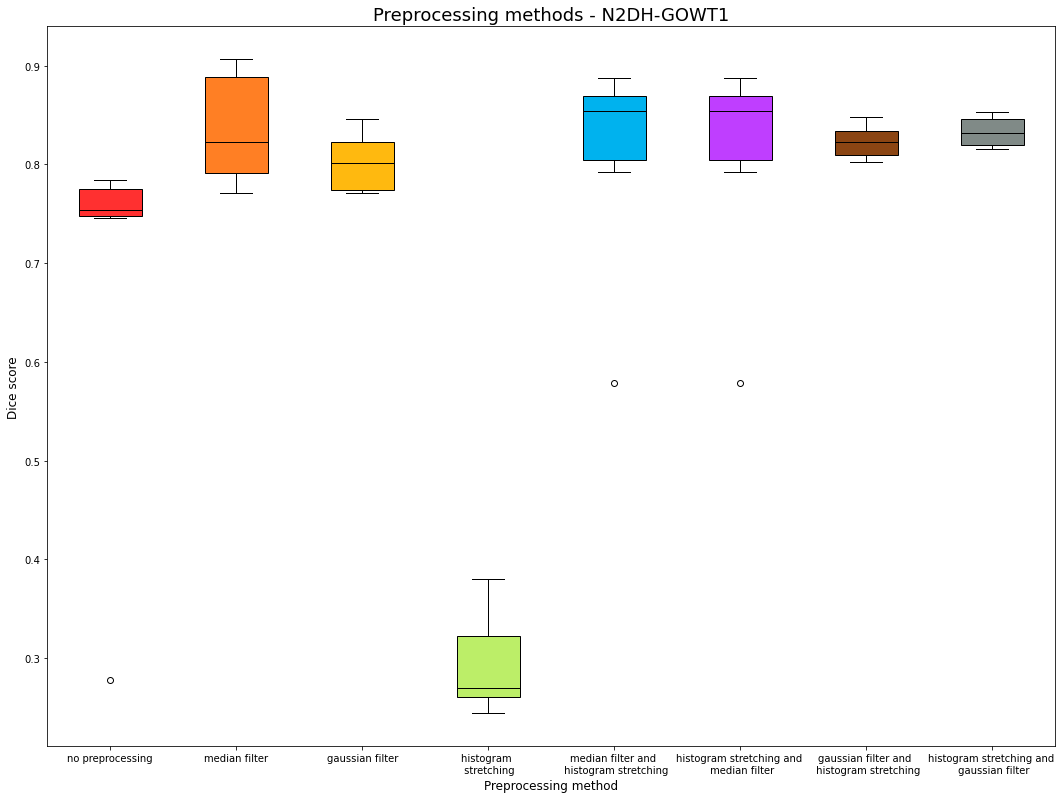

In [ ]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot - matplotlib

data_N2DH_GOWT1 = [N2DH_GOWT1_no_preprocessing , N2DH_GOWT1_median_filter , N2DH_GOWT1_gaussian_filter , N2DH_GOWT1_histogram_stretching , N2DH_GOWT1_median_filter_histogram_stretching , N2DH_GOWT1_histogram_stretching_median_filter , N2DH_GOWT1_gaussian_filter_histogram_stretching , N2DH_GOWT1_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DH-GOWT1' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DH_GOWT1, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)



Text(0.5, 0, 'Preprocessing method')

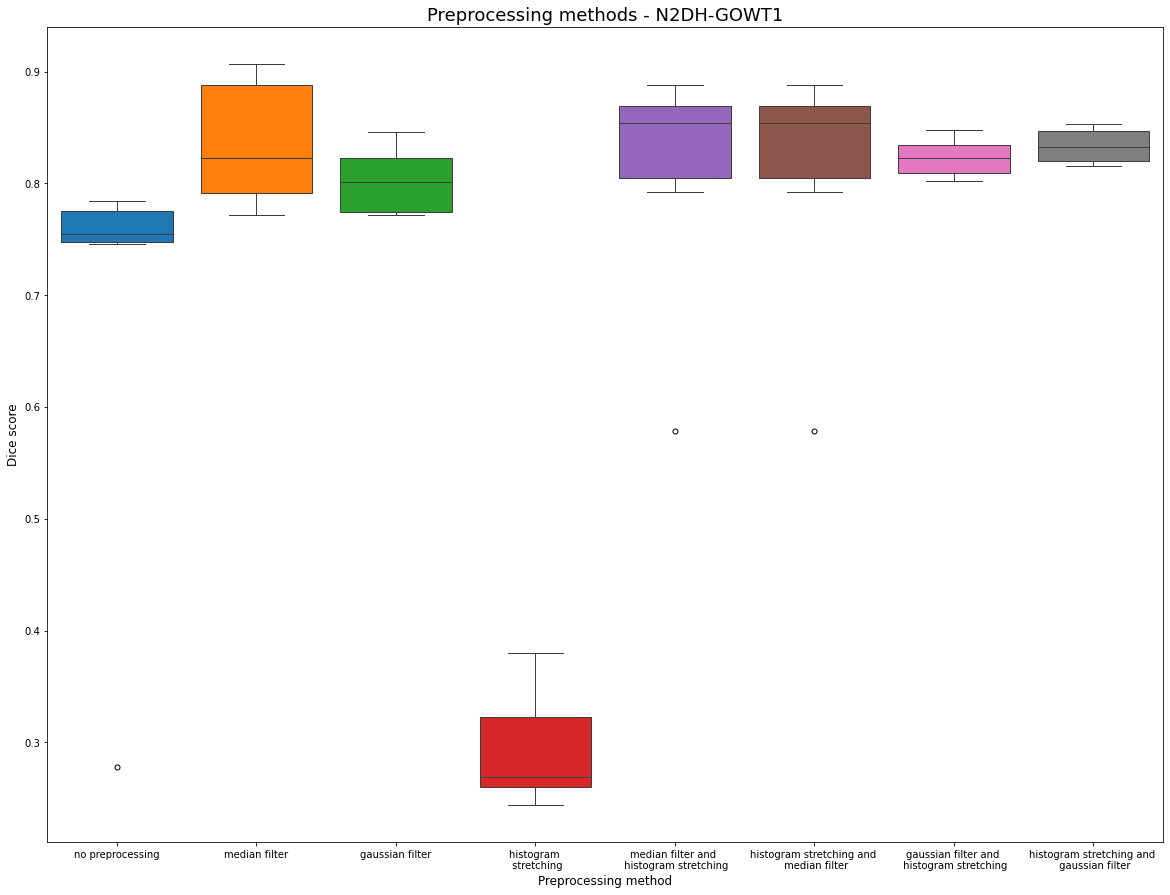

In [ ]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot - seaborn

data_N2DH_GOWT1 = [N2DH_GOWT1_no_preprocessing , N2DH_GOWT1_median_filter , N2DH_GOWT1_gaussian_filter , N2DH_GOWT1_histogram_stretching , N2DH_GOWT1_median_filter_histogram_stretching , N2DH_GOWT1_gaussian_filter_histogram_stretching]
df = pd.DataFrame({'no preprocessing' : N2DH_GOWT1_no_preprocessing , 'median filter' : N2DH_GOWT1_median_filter , 'gaussian filter' : N2DH_GOWT1_gaussian_filter , 'histogram \n stretching' : N2DH_GOWT1_histogram_stretching , 'median filter and \n histogram stretching' : N2DH_GOWT1_median_filter_histogram_stretching , 'histogram stretching and \n median filter' : N2DH_GOWT1_histogram_stretching_median_filter , 'gaussian filter and \n histogram stretching' : N2DH_GOWT1_gaussian_filter_histogram_stretching , 'histogram stretching and \n gaussian filter' : N2DH_GOWT1_histogram_stretching_gaussian_filter})
df_melted = pd.melt(df)

plt.figure(figsize=(20,15))
sns.boxplot(x = 'variable' , y = 'value' , data = df_melted  , saturation = 1 , linewidth = 1 , showmeans = False , flierprops = {"marker":"o" , "markerfacecolor":"white" , "markeredgecolor":"black" , "markersize":"5"})
# meanprops={"marker":"+" , "markeredgecolor":"black" , "markersize":"5"}
# sns.swarmplot(x = 'variable' , y = 'value' , data = df_melted , color = '.25')
plt.title('Preprocessing methods - N2DH-GOWT1' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)

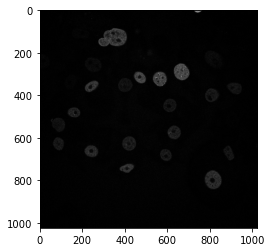

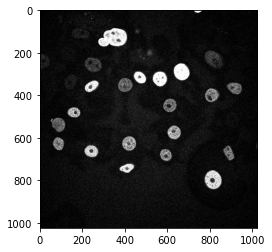

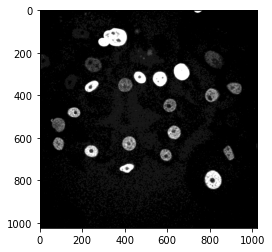

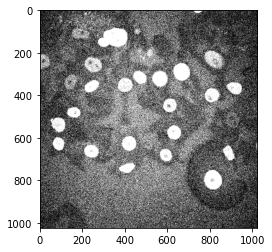

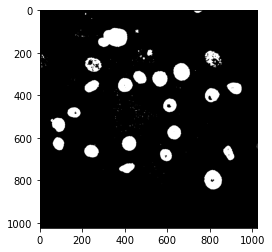

In [ ]:
figure()
imshow(img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(stretch_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(stretch_median_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(otsu_stretch_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(otsu_stretch_median_img_N2DH_GOWT1_1 , 'gray')

In [ ]:
mean(N2DH_GOWT1_no_preprocessing)

0.6830572049473754

In [ ]:
mean(N2DH_GOWT1_median_filter)

0.835697261533161

In [ ]:
mean(N2DH_GOWT1_gaussian_filter)

0.8025219317140729

In [ ]:
mean(N2DH_GOWT1_histogram_stretching)

0.29341746303468935

In [ ]:
mean(N2DH_GOWT1_median_filter_histogram_stretching)

0.8060706927415494

In [ ]:
mean(N2DH_GOWT1_gaussian_filter_histogram_stretching)

0.8230444826335548

In [ ]:
# Dice score - N2DLHeLa-dataset
## no preprocessing

N2DLHeLa_no_preprocessing = []

dice_otsu_img_N2DL_HeLa_1 = dsc.dice(otsu_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_img_N2DL_HeLa_2 = dsc.dice(otsu_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_img_N2DL_HeLa_3 = dsc.dice(otsu_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_img_N2DL_HeLa_4 = dsc.dice(otsu_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_no_preprocessing.extend([dice_otsu_img_N2DL_HeLa_1 , dice_otsu_img_N2DL_HeLa_2 , dice_otsu_img_N2DL_HeLa_3 , dice_otsu_img_N2DL_HeLa_4])

print(N2DLHeLa_no_preprocessing)


[0.7526071842410197, 0.8466689021817907, 0.855040499229567, 0.8471211954730249]


In [ ]:
# Dice score - N2DLHeLa-dataset
## median filter

N2DLHeLa_median_filter = []

dice_otsu_median_img_N2DL_HeLa_1 = dsc.dice(otsu_median_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_median_img_N2DL_HeLa_2 = dsc.dice(otsu_median_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_median_img_N2DL_HeLa_3 = dsc.dice(otsu_median_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_median_img_N2DL_HeLa_4 = dsc.dice(otsu_median_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_median_filter.extend([dice_otsu_median_img_N2DL_HeLa_1 , dice_otsu_median_img_N2DL_HeLa_2 , dice_otsu_median_img_N2DL_HeLa_3 , dice_otsu_median_img_N2DL_HeLa_4])

print(N2DLHeLa_median_filter)

[0.7563433989487788, 0.8367697782644402, 0.8556706685021362, 0.8454491969494526]


In [ ]:
# Dice score - N2DLHeLa-dataset
## gaussian filter

N2DLHeLa_gaussian_filter = []

dice_otsu_gauss_img_N2DL_HeLa_1 = dsc.dice(otsu_gauss_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_gauss_img_N2DL_HeLa_2 = dsc.dice(otsu_gauss_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_gauss_img_N2DL_HeLa_3 = dsc.dice(otsu_gauss_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_gauss_img_N2DL_HeLa_4 = dsc.dice(otsu_gauss_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_gaussian_filter.extend([dice_otsu_gauss_img_N2DL_HeLa_1 , dice_otsu_gauss_img_N2DL_HeLa_2 , dice_otsu_gauss_img_N2DL_HeLa_3 , dice_otsu_gauss_img_N2DL_HeLa_4])

print(N2DLHeLa_gaussian_filter)

[0.7149955777116668, 0.7520934082690716, 0.785499617330272, 0.7956104763546087]


In [ ]:
# Dice score - N2DLHeLa-dataset
## histogram stretching

N2DLHeLa_histogram_stretching = []

dice_otsu_stretch_img_N2DL_HeLa_1 = dsc.dice(otsu_stretch_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_stretch_img_N2DL_HeLa_2 = dsc.dice(otsu_stretch_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_stretch_img_N2DL_HeLa_3 = dsc.dice(otsu_stretch_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_stretch_img_N2DL_HeLa_4 = dsc.dice(otsu_stretch_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_histogram_stretching.extend([dice_otsu_stretch_img_N2DL_HeLa_1 , dice_otsu_stretch_img_N2DL_HeLa_2 , dice_otsu_stretch_img_N2DL_HeLa_3 , dice_otsu_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching)

[0.8817603654829008, 0.9000374463509011, 0.8842740559972709, 0.8889154796216717]


In [ ]:
# Dice score - N2DLHeLa-dataset
## median filter and histogram stretching

N2DLHeLa_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_N2DL_HeLa_1 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_median_stretch_img_N2DL_HeLa_2 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_median_stretch_img_N2DL_HeLa_3 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_median_stretch_img_N2DL_HeLa_4 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_N2DL_HeLa_1 , dice_otsu_median_stretch_img_N2DL_HeLa_2 , dice_otsu_median_stretch_img_N2DL_HeLa_3 , dice_otsu_median_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_median_filter_histogram_stretching)

[0.8834956222895016, 0.9013899613899614, 0.883259073329675, 0.88823664106247]


In [ ]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and median filter 

N2DLHeLa_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_N2DL_HeLa_1 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_stretch_median_img_N2DL_HeLa_2 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_stretch_median_img_N2DL_HeLa_3 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_stretch_median_img_N2DL_HeLa_4 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_N2DL_HeLa_1 , dice_otsu_stretch_median_img_N2DL_HeLa_2 , dice_otsu_stretch_median_img_N2DL_HeLa_3 , dice_otsu_stretch_median_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching_median_filter)

[0.884561339703427, 0.9014675457762138, 0.8807250901879707, 0.8877135692132215]


In [ ]:
# Dice score - N2DLHeLa-dataset
## gaussian filter and histogram stretching

N2DLHeLa_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_N2DL_HeLa_1 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_gauss_stretch_img_N2DL_HeLa_2 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_gauss_stretch_img_N2DL_HeLa_3 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_gauss_stretch_img_N2DL_HeLa_4 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_N2DL_HeLa_1 , dice_otsu_gauss_stretch_img_N2DL_HeLa_2 , dice_otsu_gauss_stretch_img_N2DL_HeLa_3 , dice_otsu_gauss_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_gaussian_filter_histogram_stretching)

[0.6530622496264018, 0.7044279679792043, 0.7747116693064448, 0.7838366626335911]


In [ ]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and gaussian filter 

N2DLHeLa_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_N2DL_HeLa_1 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_stretch_gauss_img_N2DL_HeLa_2 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_stretch_gauss_img_N2DL_HeLa_3 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_stretch_gauss_img_N2DL_HeLa_4 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_N2DL_HeLa_1 , dice_otsu_stretch_gauss_img_N2DL_HeLa_2 , dice_otsu_stretch_gauss_img_N2DL_HeLa_3 , dice_otsu_stretch_gauss_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching_gaussian_filter)

[0.6811229428848016, 0.7140455608436751, 0.7755902706650397, 0.7857532295083409]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_7399/2862098958.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


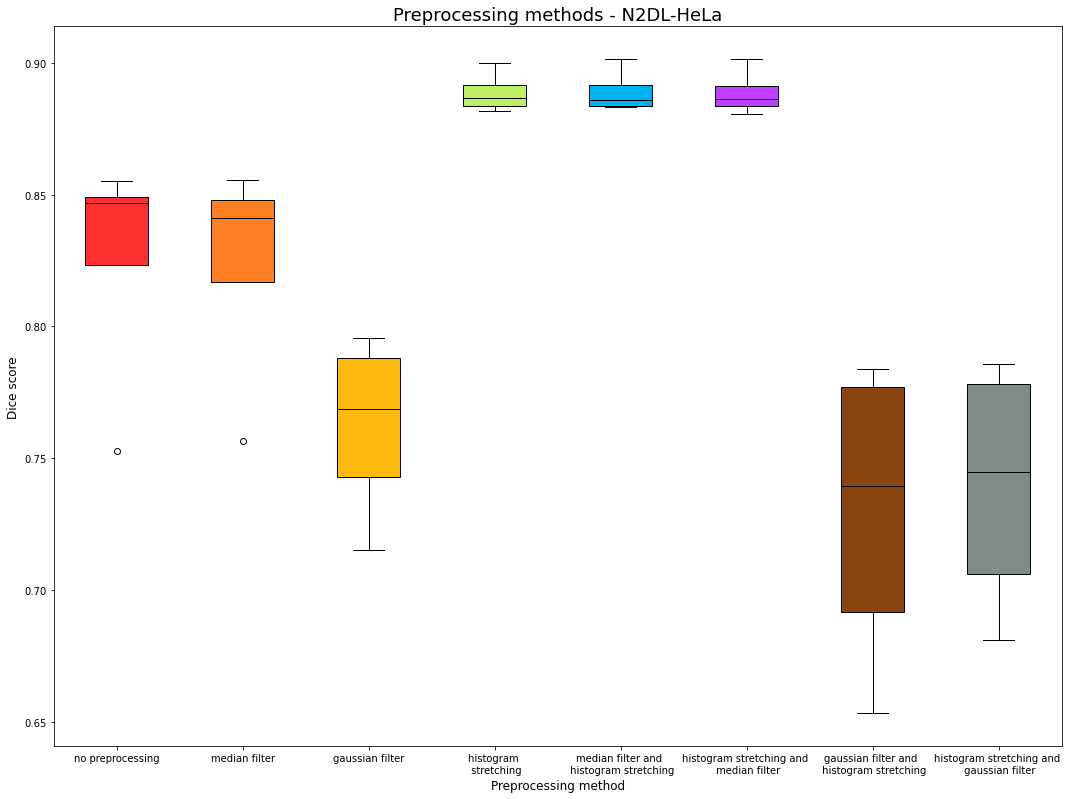

In [ ]:
# Dice score - preprocessing - N2DLHeLa-dataset - boxplot

data_N2DLHeLa = [N2DLHeLa_no_preprocessing , N2DLHeLa_median_filter , N2DLHeLa_gaussian_filter , N2DLHeLa_histogram_stretching , N2DLHeLa_median_filter_histogram_stretching , N2DLHeLa_histogram_stretching_median_filter , N2DLHeLa_gaussian_filter_histogram_stretching , N2DLHeLa_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DL-HeLa' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DLHeLa, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

Text(0.5, 0, 'Preprocessing method')

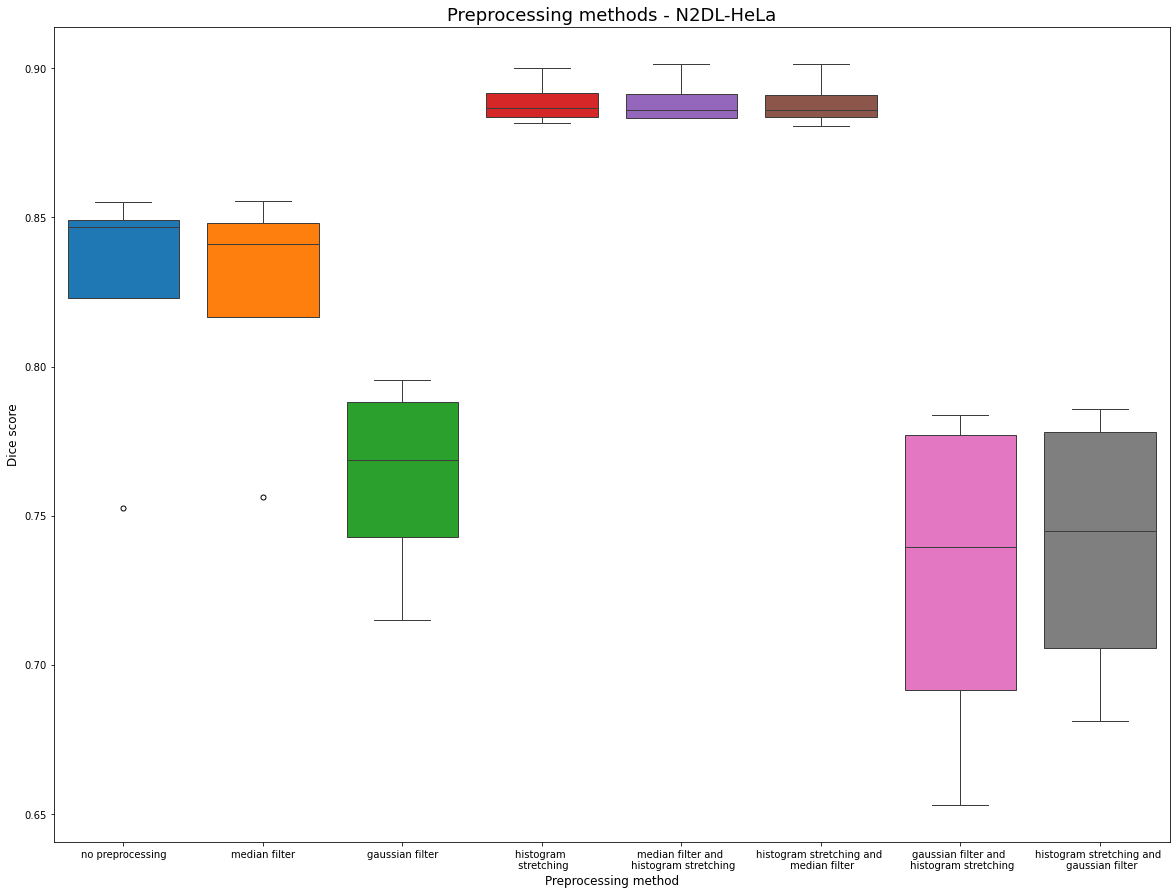

In [ ]:
# Dice score - preprocessing - N2DL-HeLa-dataset - boxplot - seaborn

data_N2DL_HeLa = [N2DLHeLa_no_preprocessing , N2DLHeLa_median_filter , N2DLHeLa_gaussian_filter , N2DLHeLa_histogram_stretching , N2DLHeLa_median_filter_histogram_stretching , N2DLHeLa_gaussian_filter_histogram_stretching]
df = pd.DataFrame({'no preprocessing' : N2DLHeLa_no_preprocessing , 'median filter' : N2DLHeLa_median_filter , 'gaussian filter' : N2DLHeLa_gaussian_filter , 'histogram \n stretching' : N2DLHeLa_histogram_stretching , 'median filter and \n histogram stretching' : N2DLHeLa_median_filter_histogram_stretching , 'histogram stretching and \n median filter' : N2DLHeLa_histogram_stretching_median_filter , 'gaussian filter and \n histogram stretching' : N2DLHeLa_gaussian_filter_histogram_stretching ,'histogram stretching and \n gaussian filter' : N2DLHeLa_histogram_stretching_gaussian_filter})
df_melted = pd.melt(df)

plt.figure(figsize=(20,15))
sns.boxplot(x = 'variable' , y = 'value' , data = df_melted  , saturation = 1 , linewidth = 1 , showmeans = False , flierprops = {"marker":"o" , "markerfacecolor":"white" , "markeredgecolor":"black" , "markersize":"5"})
# meanprops={"marker":"+" , "markeredgecolor":"black" , "markersize":"5"}
# sns.swarmplot(x = 'variable' , y = 'value' , data = df_melted , color = '.25')
plt.title('Preprocessing methods - N2DL-HeLa' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)

In [ ]:
mean(N2DLHeLa_no_preprocessing)

0.8253594452813506

In [ ]:
mean(N2DH_GOWT1_median_filter)

0.835697261533161

In [ ]:
mean(N2DH_GOWT1_gaussian_filter)

0.8025219317140729

In [ ]:
mean(N2DLHeLa_histogram_stretching)

0.8887468368631861

In [ ]:
mean(N2DLHeLa_median_filter_histogram_stretching)

0.8890953245179021

In [ ]:
mean(N2DLHeLa_gaussian_filter_histogram_stretching)

0.7290096373864104

In [ ]:
# Dice score - NIH3T3-dataset
## no preprocessing

NIH3T3_no_preprocessing = []

dice_otsu_img_NIH3T3_1 = dsc.dice(otsu_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_img_NIH3T3_2 = dsc.dice(otsu_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_img_NIH3T3_3 = dsc.dice(otsu_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_img_NIH3T3_4 = dsc.dice(otsu_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_img_NIH3T3_5 = dsc.dice(otsu_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_img_NIH3T3_6 = dsc.dice(otsu_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_img_NIH3T3_7 = dsc.dice(otsu_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_img_NIH3T3_8 = dsc.dice(otsu_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_img_NIH3T3_9 = dsc.dice(otsu_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_img_NIH3T3_10 = dsc.dice(otsu_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_img_NIH3T3_11 = dsc.dice(otsu_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_img_NIH3T3_12 = dsc.dice(otsu_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_img_NIH3T3_13 = dsc.dice(otsu_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_img_NIH3T3_14 = dsc.dice(otsu_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_img_NIH3T3_15 = dsc.dice(otsu_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_img_NIH3T3_16 = dsc.dice(otsu_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_img_NIH3T3_17 = dsc.dice(otsu_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_img_NIH3T3_18 = dsc.dice(otsu_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_no_preprocessing.extend([dice_otsu_img_NIH3T3_1 , dice_otsu_img_NIH3T3_2 , dice_otsu_img_NIH3T3_3 , dice_otsu_img_NIH3T3_4 , dice_otsu_img_NIH3T3_5 , dice_otsu_img_NIH3T3_6 , dice_otsu_img_NIH3T3_7 , dice_otsu_img_NIH3T3_8 , dice_otsu_img_NIH3T3_9 , dice_otsu_img_NIH3T3_10 , dice_otsu_img_NIH3T3_11 , dice_otsu_img_NIH3T3_12 , dice_otsu_img_NIH3T3_13 , dice_otsu_img_NIH3T3_14 , dice_otsu_img_NIH3T3_15 , dice_otsu_img_NIH3T3_16 , dice_otsu_img_NIH3T3_17 , dice_otsu_img_NIH3T3_18])

print(NIH3T3_no_preprocessing)

[0.9417263695042412, 0.9439370328532631, 0.5938264317277092, 0.758336987687637, 0.7993590316749856, 0.7272126154647645, 0.6814227277548294, 0.7181630754976537, 0.39260486580391374, 0.6171748562804691, 0.6454109779570866, 0.41456195234474275, 0.49592209998602965, 0.5905319096281916, 0.5107143326635717, 0.6345225131588169, 0.7434112841158013, 0.40626796678720645]


In [ ]:
# Dice score - N2DLHeLa-dataset
## median filter

NIH3T3_median_filter = []

dice_otsu_median_img_NIH3T3_1 = dsc.dice(otsu_median_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_median_img_NIH3T3_2 = dsc.dice(otsu_median_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_median_img_NIH3T3_3 = dsc.dice(otsu_median_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_median_img_NIH3T3_4 = dsc.dice(otsu_median_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_median_img_NIH3T3_5 = dsc.dice(otsu_median_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_median_img_NIH3T3_6 = dsc.dice(otsu_median_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_median_img_NIH3T3_7 = dsc.dice(otsu_median_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_median_img_NIH3T3_8 = dsc.dice(otsu_median_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_median_img_NIH3T3_9 = dsc.dice(otsu_median_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_median_img_NIH3T3_10 = dsc.dice(otsu_median_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_median_img_NIH3T3_11 = dsc.dice(otsu_median_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_median_img_NIH3T3_12 = dsc.dice(otsu_median_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_median_img_NIH3T3_13 = dsc.dice(otsu_median_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_median_img_NIH3T3_14 = dsc.dice(otsu_median_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_median_img_NIH3T3_15 = dsc.dice(otsu_median_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_median_img_NIH3T3_16 = dsc.dice(otsu_median_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_median_img_NIH3T3_17 = dsc.dice(otsu_median_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_median_img_NIH3T3_18 = dsc.dice(otsu_median_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_median_filter.extend([dice_otsu_median_img_NIH3T3_1 , dice_otsu_median_img_NIH3T3_2 , dice_otsu_median_img_NIH3T3_3 , dice_otsu_median_img_NIH3T3_4 , dice_otsu_median_img_NIH3T3_5 , dice_otsu_median_img_NIH3T3_6 , dice_otsu_median_img_NIH3T3_7 , dice_otsu_median_img_NIH3T3_8 , dice_otsu_median_img_NIH3T3_9 , dice_otsu_median_img_NIH3T3_10 , dice_otsu_median_img_NIH3T3_11 , dice_otsu_median_img_NIH3T3_12 , dice_otsu_median_img_NIH3T3_13 , dice_otsu_median_img_NIH3T3_14 , dice_otsu_median_img_NIH3T3_15 , dice_otsu_median_img_NIH3T3_16 , dice_otsu_median_img_NIH3T3_17 , dice_otsu_median_img_NIH3T3_18])

print(NIH3T3_median_filter)

[0.9416840081549008, 0.9462383124434127, 0.6732670793060479, 0.7593498927123763, 0.8005328157275409, 0.7308252466245031, 0.663111362184875, 0.7505073410665882, 0.35862638354962717, 0.6121039494035313, 0.6457822491803156, 0.39278789083486404, 0.4964782041578769, 0.5902833001736966, 0.5109162624916856, 0.6365087557161203, 0.7452853874248575, 0.40305388604383924]


In [ ]:
# Dice score - NIH3T3-dataset
## gaussian filter

NIH3T3_gaussian_filter = []

dice_otsu_gauss_img_NIH3T3_1 = dsc.dice(otsu_gauss_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_gauss_img_NIH3T3_2 = dsc.dice(otsu_gauss_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_gauss_img_NIH3T3_3 = dsc.dice(otsu_gauss_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_gauss_img_NIH3T3_4 = dsc.dice(otsu_gauss_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_gauss_img_NIH3T3_5 = dsc.dice(otsu_gauss_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_gauss_img_NIH3T3_6 = dsc.dice(otsu_gauss_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_gauss_img_NIH3T3_7 = dsc.dice(otsu_gauss_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_gauss_img_NIH3T3_8 = dsc.dice(otsu_gauss_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_gauss_img_NIH3T3_9 = dsc.dice(otsu_gauss_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_gauss_img_NIH3T3_10 = dsc.dice(otsu_gauss_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_gauss_img_NIH3T3_11 = dsc.dice(otsu_gauss_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_gauss_img_NIH3T3_12 = dsc.dice(otsu_gauss_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_gauss_img_NIH3T3_13 = dsc.dice(otsu_gauss_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_gauss_img_NIH3T3_14 = dsc.dice(otsu_gauss_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_gauss_img_NIH3T3_15 = dsc.dice(otsu_gauss_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_gauss_img_NIH3T3_16 = dsc.dice(otsu_gauss_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_gauss_img_NIH3T3_17 = dsc.dice(otsu_gauss_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_gauss_img_NIH3T3_18 = dsc.dice(otsu_gauss_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_gaussian_filter.extend([dice_otsu_gauss_img_NIH3T3_1 , dice_otsu_gauss_img_NIH3T3_2 , dice_otsu_gauss_img_NIH3T3_3 , dice_otsu_gauss_img_NIH3T3_4 , dice_otsu_gauss_img_NIH3T3_5 , dice_otsu_gauss_img_NIH3T3_6 , dice_otsu_gauss_img_NIH3T3_7 , dice_otsu_gauss_img_NIH3T3_8 , dice_otsu_gauss_img_NIH3T3_9 , dice_otsu_gauss_img_NIH3T3_10 , dice_otsu_gauss_img_NIH3T3_11 , dice_otsu_gauss_img_NIH3T3_12 , dice_otsu_gauss_img_NIH3T3_13 , dice_otsu_gauss_img_NIH3T3_14 , dice_otsu_gauss_img_NIH3T3_15 , dice_otsu_gauss_img_NIH3T3_16 , dice_otsu_gauss_img_NIH3T3_17 , dice_otsu_gauss_img_NIH3T3_18])

print(NIH3T3_gaussian_filter)

[0.9582317287022252, 0.9417194238784746, 0.6885517260646471, 0.7581473533144197, 0.794415283365751, 0.7202453028433696, 0.6642902871004144, 0.737356376113577, 0.34109424457847193, 0.5878872497555732, 0.6341297269151073, 0.42351251888306146, 0.49619275670928237, 0.5874195005928476, 0.5220720201708795, 0.6177874228992648, 0.738947467299157, 0.486173647469459]


In [ ]:
# Dice score - NIH3T3-dataset
## histogram stretching

NIH3T3_histogram_stretching = []

dice_otsu_stretch_img_NIH3T3_1 = dsc.dice(otsu_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_img_NIH3T3_2 = dsc.dice(otsu_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_img_NIH3T3_3 = dsc.dice(otsu_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_img_NIH3T3_4 = dsc.dice(otsu_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_img_NIH3T3_5 = dsc.dice(otsu_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_img_NIH3T3_6 = dsc.dice(otsu_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_img_NIH3T3_7 = dsc.dice(otsu_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_img_NIH3T3_8 = dsc.dice(otsu_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_img_NIH3T3_9 = dsc.dice(otsu_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_img_NIH3T3_10 = dsc.dice(otsu_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_img_NIH3T3_11 = dsc.dice(otsu_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_img_NIH3T3_12 = dsc.dice(otsu_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_img_NIH3T3_13 = dsc.dice(otsu_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_img_NIH3T3_14 = dsc.dice(otsu_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_img_NIH3T3_15 = dsc.dice(otsu_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_img_NIH3T3_16 = dsc.dice(otsu_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_img_NIH3T3_17 = dsc.dice(otsu_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_img_NIH3T3_18 = dsc.dice(otsu_stretch_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching.extend([dice_otsu_stretch_img_NIH3T3_1 , dice_otsu_stretch_img_NIH3T3_2 , dice_otsu_stretch_img_NIH3T3_3 , dice_otsu_stretch_img_NIH3T3_4 , dice_otsu_stretch_img_NIH3T3_5 , dice_otsu_stretch_img_NIH3T3_6 , dice_otsu_stretch_img_NIH3T3_7 , dice_otsu_stretch_img_NIH3T3_8 , dice_otsu_stretch_img_NIH3T3_9 , dice_otsu_stretch_img_NIH3T3_10 , dice_otsu_stretch_img_NIH3T3_11 , dice_otsu_stretch_img_NIH3T3_12 , dice_otsu_stretch_img_NIH3T3_13 , dice_otsu_stretch_img_NIH3T3_14 , dice_otsu_stretch_img_NIH3T3_15 , dice_otsu_stretch_img_NIH3T3_16 , dice_otsu_stretch_img_NIH3T3_17 , dice_otsu_stretch_img_NIH3T3_18])

print(NIH3T3_histogram_stretching)

[0.9540559763416978, 0.9395241079084493, 0.5938264317277092, 0.7521172841345203, 0.7827439735092878, 0.5680031518333076, 0.5266004202926399, 0.5744347950674208, 0.5655727635809071, 0.39802859302259114, 0.512618527872317, 0.41456195234474275, 0.3530470588777169, 0.5888867196183458, 0.5107143326635717, 0.5575910635276661, 0.6897927754884456, 0.4520324380023766]


In [ ]:
# Dice score - NIH3T3-dataset
## median filter and histogram stretching

NIH3T3_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_NIH3T3_1 = dsc.dice(otsu_median_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_median_stretch_img_NIH3T3_2 = dsc.dice(otsu_median_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_median_stretch_img_NIH3T3_3 = dsc.dice(otsu_median_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_median_stretch_img_NIH3T3_4 = dsc.dice(otsu_median_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_median_stretch_img_NIH3T3_5 = dsc.dice(otsu_median_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_median_stretch_img_NIH3T3_6 = dsc.dice(otsu_median_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_median_stretch_img_NIH3T3_7 = dsc.dice(otsu_median_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_median_stretch_img_NIH3T3_8 = dsc.dice(otsu_median_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_median_stretch_img_NIH3T3_9 = dsc.dice(otsu_median_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_median_stretch_img_NIH3T3_10 = dsc.dice(otsu_median_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_median_stretch_img_NIH3T3_11 = dsc.dice(otsu_median_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_median_stretch_img_NIH3T3_12 = dsc.dice(otsu_median_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_median_stretch_img_NIH3T3_13 = dsc.dice(otsu_median_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_median_stretch_img_NIH3T3_14 = dsc.dice(otsu_median_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_median_stretch_img_NIH3T3_15 = dsc.dice(otsu_median_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_median_stretch_img_NIH3T3_16 = dsc.dice(otsu_median_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_median_stretch_img_NIH3T3_17 = dsc.dice(otsu_median_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_median_stretch_img_NIH3T3_18 = dsc.dice(otsu_median_stretch_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_NIH3T3_1 , dice_otsu_median_stretch_img_NIH3T3_2 , dice_otsu_median_stretch_img_NIH3T3_3 , dice_otsu_median_stretch_img_NIH3T3_4 , dice_otsu_median_stretch_img_NIH3T3_5 , dice_otsu_median_stretch_img_NIH3T3_6 , dice_otsu_median_stretch_img_NIH3T3_7 , dice_otsu_median_stretch_img_NIH3T3_8 , dice_otsu_median_stretch_img_NIH3T3_9 , dice_otsu_median_stretch_img_NIH3T3_10 , dice_otsu_median_stretch_img_NIH3T3_11 , dice_otsu_median_stretch_img_NIH3T3_12 , dice_otsu_median_stretch_img_NIH3T3_13 , dice_otsu_median_stretch_img_NIH3T3_14 , dice_otsu_median_stretch_img_NIH3T3_15 , dice_otsu_median_stretch_img_NIH3T3_16 , dice_otsu_median_stretch_img_NIH3T3_17 , dice_otsu_median_stretch_img_NIH3T3_18])

print(NIH3T3_median_filter_histogram_stretching)

[0.9542517930375836, 0.9436915173888986, 0.597743423825288, 0.7535842572947709, 0.7863621972196926, 0.5691051388685712, 0.5268406266169837, 0.5742365445576996, 0.5652128909150641, 0.40459945894230437, 0.5154122480586806, 0.39278789083486404, 0.35270584210264927, 0.5889633064063944, 0.5109162624916856, 0.5315650349888865, 0.6978455124809924, 0.4506835064207276]


In [ ]:
# Dice score - NIH3T3-dataset
## histogram stretching and median filter

NIH3T3_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_NIH3T3_1 = dsc.dice(otsu_stretch_median_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_median_img_NIH3T3_2 = dsc.dice(otsu_stretch_median_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_median_img_NIH3T3_3 = dsc.dice(otsu_stretch_median_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_median_img_NIH3T3_4 = dsc.dice(otsu_stretch_median_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_median_img_NIH3T3_5 = dsc.dice(otsu_stretch_median_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_median_img_NIH3T3_6 = dsc.dice(otsu_stretch_median_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_median_img_NIH3T3_7 = dsc.dice(otsu_stretch_median_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_median_img_NIH3T3_8 = dsc.dice(otsu_stretch_median_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_median_img_NIH3T3_9 = dsc.dice(otsu_stretch_median_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_median_img_NIH3T3_10 = dsc.dice(otsu_stretch_median_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_median_img_NIH3T3_11 = dsc.dice(otsu_stretch_median_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_median_img_NIH3T3_12 = dsc.dice(otsu_stretch_median_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_median_img_NIH3T3_13 = dsc.dice(otsu_stretch_median_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_median_img_NIH3T3_14 = dsc.dice(otsu_stretch_median_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_median_img_NIH3T3_15 = dsc.dice(otsu_stretch_median_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_median_img_NIH3T3_16 = dsc.dice(otsu_stretch_median_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_median_img_NIH3T3_17 = dsc.dice(otsu_stretch_median_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_median_img_NIH3T3_18 = dsc.dice(otsu_stretch_median_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_NIH3T3_1 , dice_otsu_stretch_median_img_NIH3T3_2 ,dice_otsu_stretch_median_img_NIH3T3_3 , dice_otsu_stretch_median_img_NIH3T3_4 , dice_otsu_stretch_median_img_NIH3T3_5 , dice_otsu_stretch_median_img_NIH3T3_6 , dice_otsu_stretch_median_img_NIH3T3_7 , dice_otsu_stretch_median_img_NIH3T3_8 , dice_otsu_stretch_median_img_NIH3T3_9 , dice_otsu_stretch_median_img_NIH3T3_10 , dice_otsu_stretch_median_img_NIH3T3_11 , dice_otsu_stretch_median_img_NIH3T3_12 , dice_otsu_stretch_median_img_NIH3T3_13 , dice_otsu_stretch_median_img_NIH3T3_14 , dice_otsu_stretch_median_img_NIH3T3_15 , dice_otsu_stretch_median_img_NIH3T3_16 , dice_otsu_stretch_median_img_NIH3T3_17 , dice_otsu_stretch_median_img_NIH3T3_18])

print(NIH3T3_histogram_stretching_median_filter)

[0.9542517930375836, 0.9436915173888986, 0.597743423825288, 0.7535842572947709, 0.7863621972196926, 0.5691051388685712, 0.5268406266169837, 0.5742365445576996, 0.5652128909150641, 0.3986896534191402, 0.5154122480586806, 0.39278789083486404, 0.35270584210264927, 0.5889633064063944, 0.5109162624916856, 0.557841131280202, 0.6978455124809924, 0.4506835064207276]


In [ ]:
# Dice score - NIH3T3-dataset
## gaussian filter and histogram stretching

thresholded = [otsu_gauss_stretch_img_NIH3T3_1 , otsu_gauss_stretch_img_NIH3T3_2 , otsu_gauss_stretch_img_NIH3T3_3, otsu_gauss_stretch_img_NIH3T3_4 , otsu_gauss_stretch_img_NIH3T3_5 , otsu_gauss_stretch_img_NIH3T3_6 , otsu_gauss_stretch_img_NIH3T3_7 , otsu_gauss_stretch_img_NIH3T3_8 , otsu_gauss_stretch_img_NIH3T3_9 , otsu_gauss_stretch_img_NIH3T3_10 , otsu_gauss_stretch_img_NIH3T3_11 , otsu_gauss_stretch_img_NIH3T3_12 , otsu_gauss_stretch_img_NIH3T3_13 , otsu_gauss_stretch_img_NIH3T3_14 , otsu_gauss_stretch_img_NIH3T3_15 , otsu_gauss_stretch_img_NIH3T3_16 , otsu_gauss_stretch_img_NIH3T3_17 , otsu_gauss_stretch_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_NIH3T3_1 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_gauss_stretch_img_NIH3T3_2 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_gauss_stretch_img_NIH3T3_3 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_gauss_stretch_img_NIH3T3_4 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_gauss_stretch_img_NIH3T3_5 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_gauss_stretch_img_NIH3T3_6 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_gauss_stretch_img_NIH3T3_7 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_gauss_stretch_img_NIH3T3_8 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_gauss_stretch_img_NIH3T3_9 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_gauss_stretch_img_NIH3T3_10 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_gauss_stretch_img_NIH3T3_11 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_gauss_stretch_img_NIH3T3_12 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_gauss_stretch_img_NIH3T3_13 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_gauss_stretch_img_NIH3T3_14 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_gauss_stretch_img_NIH3T3_15 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_gauss_stretch_img_NIH3T3_16 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_gauss_stretch_img_NIH3T3_17 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_gauss_stretch_img_NIH3T3_18 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_18 , gt_NIH3T3_18)

NIH3T3_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_NIH3T3_1 , dice_otsu_gauss_stretch_img_NIH3T3_2 , dice_otsu_gauss_stretch_img_NIH3T3_3 , dice_otsu_gauss_stretch_img_NIH3T3_4 , dice_otsu_gauss_stretch_img_NIH3T3_5 , dice_otsu_gauss_stretch_img_NIH3T3_6 , dice_otsu_gauss_stretch_img_NIH3T3_7 , dice_otsu_gauss_stretch_img_NIH3T3_8 , dice_otsu_gauss_stretch_img_NIH3T3_9 , dice_otsu_gauss_stretch_img_NIH3T3_10 , dice_otsu_gauss_stretch_img_NIH3T3_11 , dice_otsu_gauss_stretch_img_NIH3T3_12 , dice_otsu_gauss_stretch_img_NIH3T3_13 , dice_otsu_gauss_stretch_img_NIH3T3_14 , dice_otsu_gauss_stretch_img_NIH3T3_15 , dice_otsu_gauss_stretch_img_NIH3T3_16 , dice_otsu_gauss_stretch_img_NIH3T3_17 , dice_otsu_gauss_stretch_img_NIH3T3_18])

print(NIH3T3_gaussian_filter_histogram_stretching)

[0.9681808251137974, 0.9435621046993571, 0.6817172643745101, 0.7657179979819481, 0.7925904065892527, 0.5785660557672693, 0.5389614306097555, 0.5871540079112676, 0.5536924464752787, 0.40460811759113235, 0.5466147195039964, 0.4235905354087552, 0.36244916914703956, 0.5879315952885515, 0.5208066485339254, 0.5512281949150288, 0.7312987538245851, 0.4811669802219358]


In [ ]:
# Dice score - NIH3T3-dataset
## histogram stretching and gaussian filter

NIH3T3_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_NIH3T3_1 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_gauss_img_NIH3T3_2 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_gauss_img_NIH3T3_3 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_gauss_img_NIH3T3_4 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_gauss_img_NIH3T3_5 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_gauss_img_NIH3T3_6 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_gauss_img_NIH3T3_7 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_gauss_img_NIH3T3_8 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_gauss_img_NIH3T3_9 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_gauss_img_NIH3T3_10 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_gauss_img_NIH3T3_11 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_gauss_img_NIH3T3_12 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_gauss_img_NIH3T3_13 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_gauss_img_NIH3T3_14 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_gauss_img_NIH3T3_15 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_gauss_img_NIH3T3_16 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_gauss_img_NIH3T3_17 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_gauss_img_NIH3T3_18 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_NIH3T3_1 , dice_otsu_stretch_gauss_img_NIH3T3_2 ,dice_otsu_stretch_gauss_img_NIH3T3_3 , dice_otsu_stretch_gauss_img_NIH3T3_4 , dice_otsu_stretch_gauss_img_NIH3T3_5 , dice_otsu_stretch_gauss_img_NIH3T3_6 , dice_otsu_stretch_gauss_img_NIH3T3_7 , dice_otsu_stretch_gauss_img_NIH3T3_8 , dice_otsu_stretch_gauss_img_NIH3T3_9 , dice_otsu_stretch_gauss_img_NIH3T3_10 , dice_otsu_stretch_gauss_img_NIH3T3_11 , dice_otsu_stretch_gauss_img_NIH3T3_12 , dice_otsu_stretch_gauss_img_NIH3T3_13 , dice_otsu_stretch_gauss_img_NIH3T3_14 , dice_otsu_stretch_gauss_img_NIH3T3_15 , dice_otsu_stretch_gauss_img_NIH3T3_16 , dice_otsu_stretch_gauss_img_NIH3T3_17 , dice_otsu_stretch_gauss_img_NIH3T3_18])

print(NIH3T3_histogram_stretching_gaussian_filter)

[0.968293833934556, 0.9433911311179478, 0.6818076648137553, 0.7662357789050415, 0.7926944940071503, 0.5786247415236158, 0.5376916293552534, 0.5869921154168763, 0.5540418926591208, 0.40365911361127177, 0.5389769278550764, 0.4245222152472623, 0.36180054389117583, 0.5876610430502276, 0.5195969267882177, 0.5476667460026049, 0.7228006042726638, 0.4845800546430186]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_7399/3156945178.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


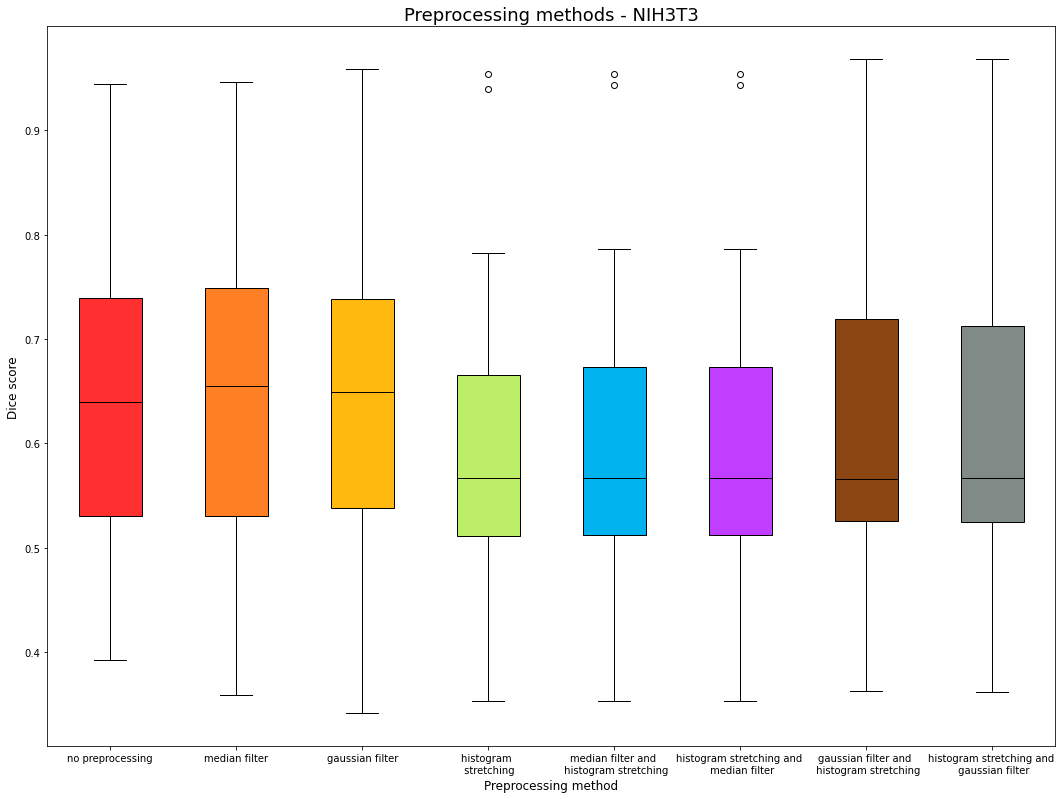

In [ ]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot

data_NIH3T3 = [NIH3T3_no_preprocessing , NIH3T3_median_filter , NIH3T3_gaussian_filter , NIH3T3_histogram_stretching , NIH3T3_median_filter_histogram_stretching , NIH3T3_histogram_stretching_median_filter , NIH3T3_gaussian_filter_histogram_stretching , NIH3T3_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_NIH3T3, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

Text(0.5, 0, 'Preprocessing method')

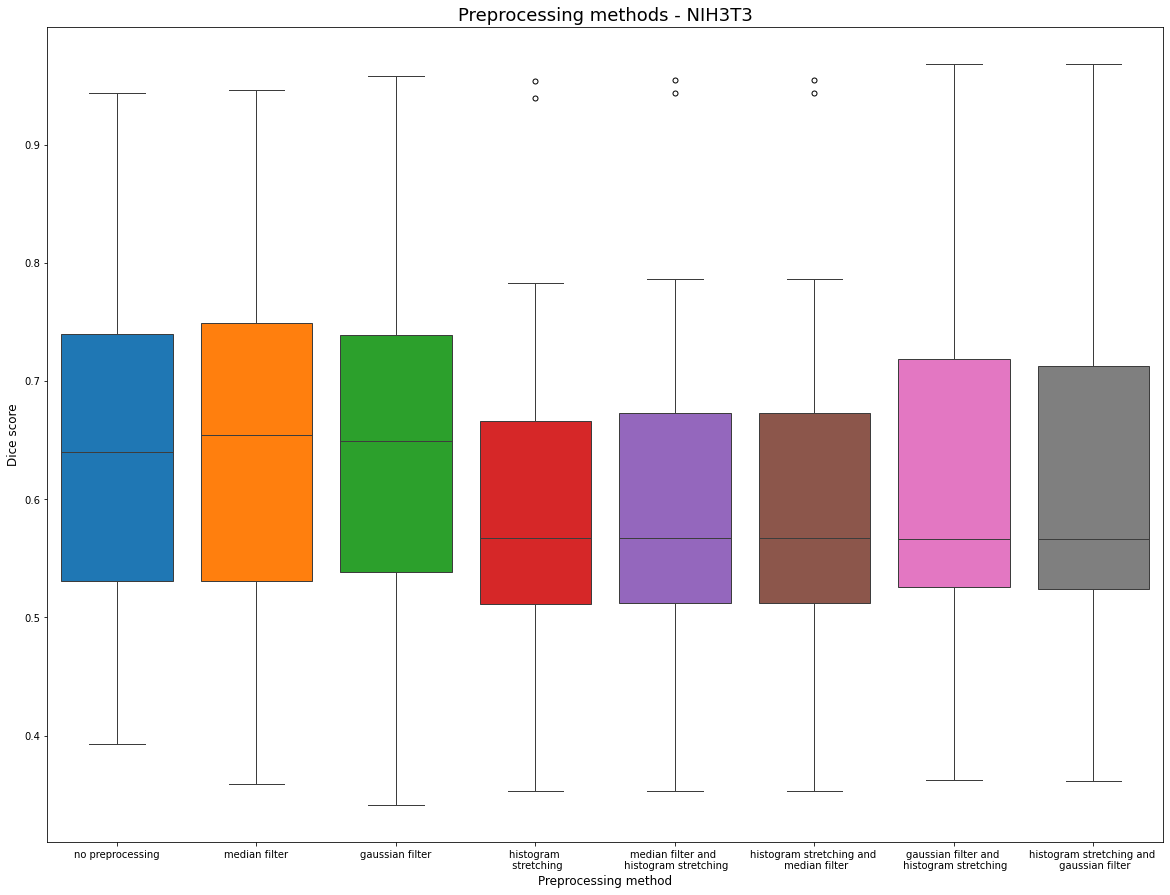

In [ ]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot - seaborn

data_NIH3T3 = [NIH3T3_no_preprocessing , NIH3T3_median_filter , NIH3T3_gaussian_filter , NIH3T3_histogram_stretching , NIH3T3_median_filter_histogram_stretching , NIH3T3_gaussian_filter_histogram_stretching]
df = pd.DataFrame({'no preprocessing' : NIH3T3_no_preprocessing , 'median filter' : NIH3T3_median_filter , 'gaussian filter' : NIH3T3_gaussian_filter , 'histogram \n stretching' : NIH3T3_histogram_stretching , 'median filter and \n histogram stretching' : NIH3T3_median_filter_histogram_stretching , 'histogram stretching and \n median filter' : NIH3T3_histogram_stretching_median_filter , 'gaussian filter and \n histogram stretching' : NIH3T3_gaussian_filter_histogram_stretching , 'histogram stretching and \n gaussian filter' : NIH3T3_histogram_stretching_gaussian_filter})
df_melted = pd.melt(df)

plt.figure(figsize=(20,15))
sns.boxplot(x = 'variable' , y = 'value' , data = df_melted  , saturation = 1 , linewidth = 1 , showmeans = False , flierprops = {"marker":"o" , "markerfacecolor":"white" , "markeredgecolor":"black" , "markersize":"5"})
# meanprops={"marker":"+" , "markeredgecolor":"black" , "markersize":"5"}
# sns.swarmplot(x = 'variable' , y = 'value' , data = df_melted , color = '.25')
plt.title('Preprocessing methods - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)

In [ ]:
mean(NIH3T3_no_preprocessing)

0.6452837239383841

In [ ]:
mean(NIH3T3_median_filter)

0.6476301292887032

In [ ]:
mean(NIH3T3_gaussian_filter)

0.649898557591999

In [ ]:
mean(NIH3T3_histogram_stretching)

0.5963417981007618

In [ ]:
mean(NIH3T3_median_filter_histogram_stretching)

0.5953615251362075

In [ ]:
mean(NIH3T3_gaussian_filter_histogram_stretching)

0.6122131807754104

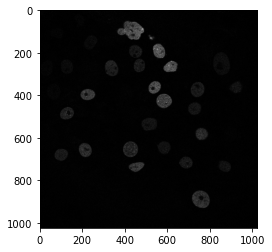

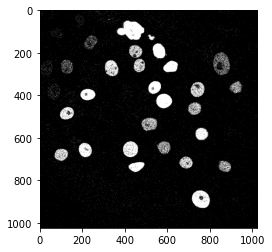

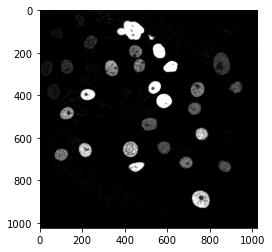

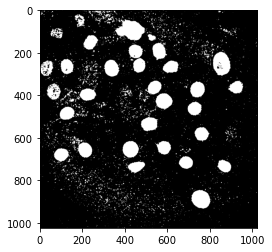

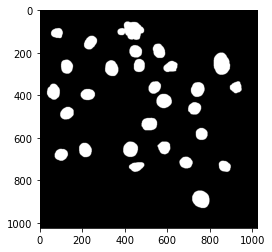

In [ ]:
# Good examples for report - N2DH-GOWT1

figure()
imshow(img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(otsu_img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(median_stretch_img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(otsu_median_stretch_img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(binary_gt_N2DH_GOWT1_6 , 'gray')

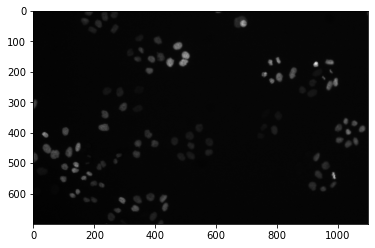

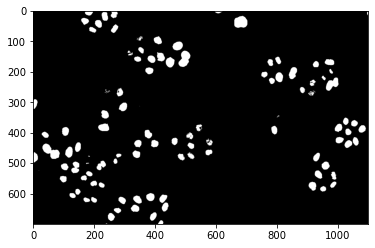

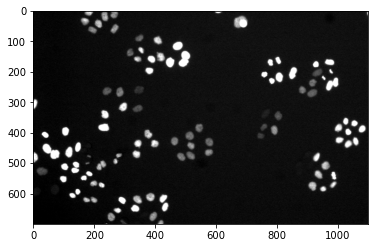

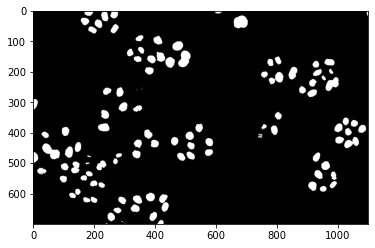

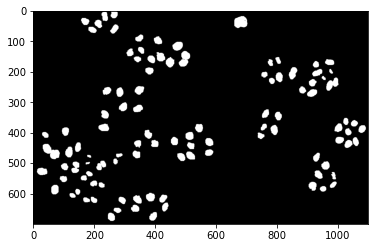

In [ ]:
# Good examples for report - N2DL-HeLa

figure()
imshow(img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(stretch_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_stretch_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(binary_gt_N2DL_HeLa_2 , 'gray')

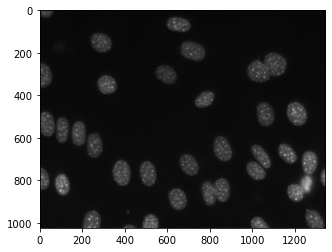

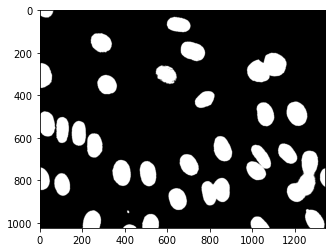

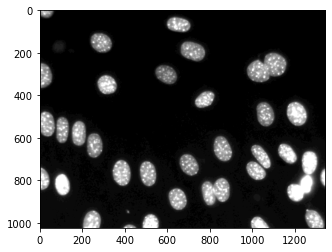

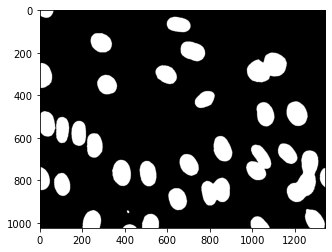

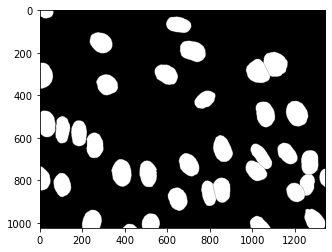

In [ ]:
# Good examples for report - NIH3T3

figure()
imshow(img_NIH3T3_1 , 'gray')

figure()
imshow(otsu_img_NIH3T3_1 , 'gray')

figure()
imshow(median_stretch_img_NIH3T3_1 , 'gray')

figure()
imshow(otsu_median_stretch_img_NIH3T3_1 , 'gray')

figure()
imshow(gt_NIH3T3_1 , 'gray')

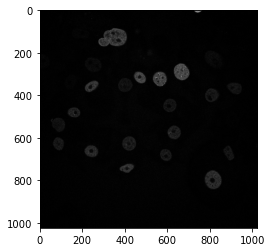

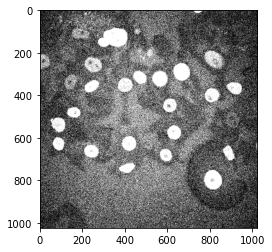

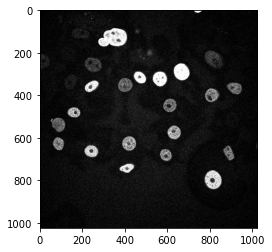

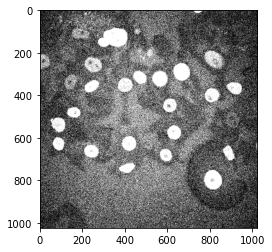

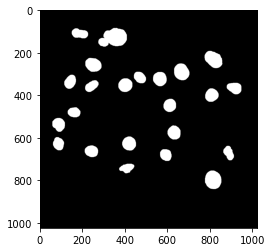

In [ ]:
# Bad examples for report - N2DH-GOWT1

figure()
imshow(img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(otsu_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(stretch_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(otsu_stretch_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(binary_gt_N2DH_GOWT1_1 , 'gray')

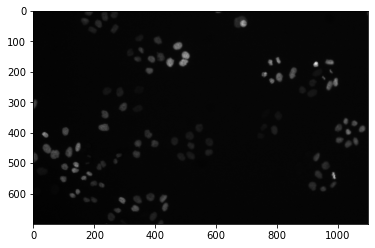

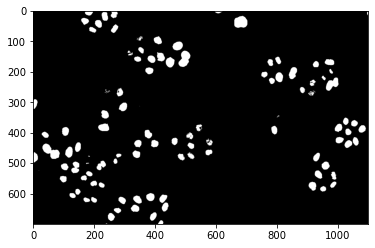

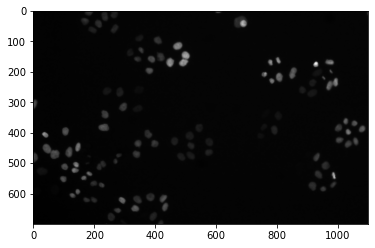

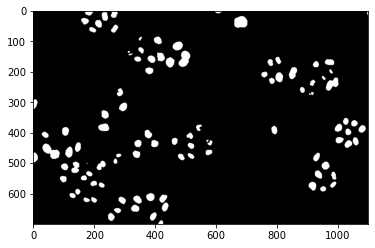

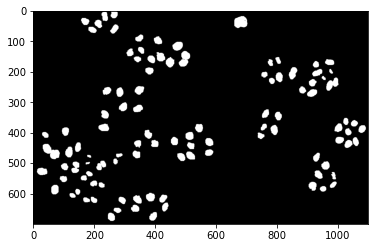

In [ ]:
# Bad examples for report - N2DL-HeLa

figure()
imshow(img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(median_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_median_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(binary_gt_N2DL_HeLa_2 , 'gray')

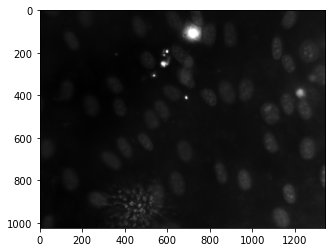

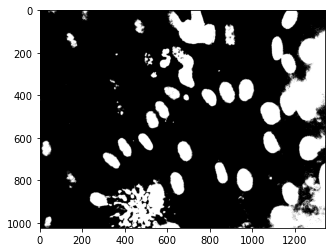

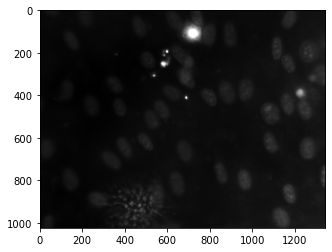

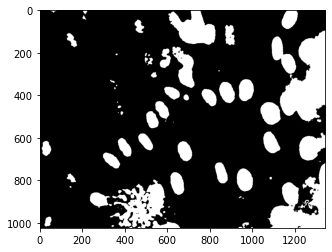

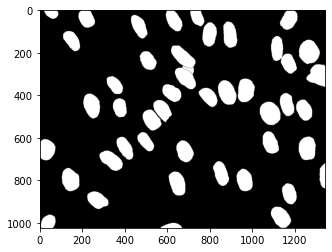

In [ ]:
# Bad examples for report - NIH3T3

figure()
imshow(img_NIH3T3_11 , 'gray')

figure()
imshow(otsu_img_NIH3T3_11 , 'gray')

figure()
imshow(median_img_NIH3T3_11 , 'gray')

figure()
imshow(otsu_median_img_NIH3T3_11 , 'gray')

figure()
imshow(gt_NIH3T3_11 , 'gray')